# Getting Dataset into Google Colab and required installation(s)

In [38]:
!git  init

Reinitialized existing Git repository in /content/.git/


In [40]:
!git add *

In [41]:
!git config --global user.email "gangulysoumyadeep231@gmail.com"
!git config --global user.name "Soumyadeep Ganguly"

In [42]:
!git commit -m "Respiratory disease classification from Audio data"

On branch main
Untracked files:
	.config/

nothing added to commit but untracked files present


In [43]:
!git remote add origin git@github.com:SGanguly1999/Respiratory-disease-classification-from-Audio-data-and-severity-analysis.git

fatal: remote origin already exists.


In [44]:
!git branch -M main


In [45]:
!ssh-keyscan -t rsa github.com >> ~/.ssh/known_hosts

# github.com:22 SSH-2.0-babeld-0e9f34fb


In [46]:
!git push -u origin main

git@github.com: Permission denied (publickey).
fatal: Could not read from remote repository.

Please make sure you have the correct access rights
and the repository exists.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
 ! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets list

ref                                                           title                                              size  lastUpdated          downloadCount  
------------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                   Reddit Vaccine Myths                              231KB  2021-06-22 06:09:25           8077  
crowww/a-large-scale-fish-dataset                             A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           4955  
imsparsh/musicnet-dataset                                     MusicNet Dataset                                   22GB  2021-02-18 14:12:19           1667  
dhruvildave/wikibooks-dataset                                 Wikibooks Dataset                                   1GB  2021-06-21 13:35:12           2276  
mathurinache/twitter-edge-nodes                               Tw

In [ ]:
!kaggle datasets download vbookshelf/respiratory-sound-database  -p /content/sample_data/ --unzip


100% 3.68G/3.69G [01:08<00:00, 39.4MB/s]
100% 3.69G/3.69G [01:09<00:00, 57.4MB/s]


In [ ]:
!cp -r /content/sample_data/ /content/drive/MyDrive/

# Getting Respiratory Dataset from google drive

In [ ]:
path="/content/drive/MyDrive/sample_data/Respiratory_Sound_Database/Respiratory_Sound_Database"

In [ ]:
import pandas as pd
import numpy as np
import librosa as lb
import os
import re

In [ ]:
diagnosis_data=pd.read_csv(path+"/patient_diagnosis.csv", names=["id","disease"])
df=diagnosis_data
df

# Is there any null values
# Is there any missing patient id
# How many classes of disease are there

id    disease
0    101       URTI
1    102    Healthy
2    103     Asthma
3    104       COPD
4    105       URTI
..   ...        ...
121  222       COPD
122  223       COPD
123  224    Healthy
124  225    Healthy
125  226  Pneumonia

[126 rows x 2 columns]

In [ ]:
df.isnull()

id  disease
0    False    False
1    False    False
2    False    False
3    False    False
4    False    False
..     ...      ...
121  False    False
122  False    False
123  False    False
124  False    False
125  False    False

[126 rows x 2 columns]

In [ ]:
null_list=df.isnull()
null_list[null_list['id'] == True]
null_list[null_list['disease'] == True]
df.info()
# Hence there are no empty cells

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       126 non-null    int64 
 1   disease  126 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.1+ KB


In [ ]:
# Now we want to see the files present in audio_and_txt
path_audio=path+"/audio_and_txt_files"
list=os.listdir(path_audio);
list

['160_1b3_Lr_mc_AKGC417L.txt',
 '160_1b3_Lr_mc_AKGC417L.wav',
 '160_1b3_Pl_mc_AKGC417L.txt',
 '160_1b3_Pl_mc_AKGC417L.wav',
 '160_1b3_Pr_mc_AKGC417L.txt',
 '160_1b3_Pr_mc_AKGC417L.wav',
 '160_1b3_Tc_mc_AKGC417L.txt',
 '160_1b3_Tc_mc_AKGC417L.wav',
 '160_1b4_Al_mc_AKGC417L.txt',
 '160_1b4_Al_mc_AKGC417L.wav',
 '160_1b4_Ar_mc_AKGC417L.txt',
 '160_1b4_Ar_mc_AKGC417L.wav',
 '160_1b4_Lr_mc_AKGC417L.txt',
 '160_1b4_Lr_mc_AKGC417L.wav',
 '160_1b4_Pl_mc_AKGC417L.txt',
 '160_1b4_Pl_mc_AKGC417L.wav',
 '160_1b4_Pr_mc_AKGC417L.txt',
 '160_1b4_Pr_mc_AKGC417L.wav',
 '160_1b4_Tc_mc_AKGC417L.txt',
 '160_1b4_Tc_mc_AKGC417L.wav',
 '160_2b3_Lr_mc_AKGC417L.txt',
 '160_2b3_Lr_mc_AKGC417L.wav',
 '160_2b4_Ar_mc_AKGC417L.txt',
 '160_2b4_Ar_mc_AKGC417L.wav',
 '160_2b4_Pl_mc_AKGC417L.txt',
 '160_2b4_Pl_mc_AKGC417L.wav',
 '160_2b4_Pr_mc_AKGC417L.txt',
 '160_2b4_Pr_mc_AKGC417L.wav',
 '160_2b4_Tc_mc_AKGC417L.txt',
 '160_2b4_Tc_mc_AKGC417L.wav',
 '161_1b1_Al_sc_Meditron.txt',
 '161_1b1_Al_sc_Meditron.wav',
 '161_1b

In [ ]:
files_data=pd.DataFrame(columns=["id","record_ind","chest_loc","acquisition","record equip","file name"])
def getInfo1(l,df):
 arr=re.split('_|\.',l)
 if arr[5] == 'txt' :
  arr[5]=l 
  df.loc[len(df.index)+1]=arr
# df1=pd.DataFrame([arr],columns=["id","record_ind","chest_loc","acquisition","record equip","file name"])
# df.append(df1,ignore_index=True)
for l in list:
  getInfo1(l,files_data)


  

In [ ]:

files_data['id']=files_data['id'].apply(pd.to_numeric)
files_data1=files_data.set_index('id')
diagnosis_data=df.set_index('id')
files_data1['disease']= diagnosis_data['disease']


In [ ]:
list_txt=files_data1['file name']
demographic_info=pd.read_csv("/content/drive/MyDrive/sample_data/demographic_info.txt",sep=" ",names=["id","age","sex","adult bmi","child weight","child_height"])
# demographic_info[["id","age"]]=demographic_info.apply({"id":pd.to_numeric,"age":pd.to_numeric})
demographic_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            126 non-null    int64  
 1   age           125 non-null    float64
 2   sex           125 non-null    object 
 3   adult bmi     75 non-null     float64
 4   child weight  44 non-null     float64
 5   child_height  42 non-null     float64
dtypes: float64(4), int64(1), object(1)
memory usage: 6.0+ KB


In [ ]:
# Lets create a dataframe which contains child and adult eliminating missing rows
filter1=demographic_info["adult bmi"].isna() & demographic_info["child weight"].isna() & demographic_info["child_height"].isna()
child_adult_demo=demographic_info[~filter1]
child_adult_demo

id    age sex  adult bmi  child weight  child_height
0    101   3.00   F        NaN          19.0          99.0
1    102   0.75   F        NaN           9.8          73.0
2    103  70.00   F      33.00           NaN           NaN
3    104  70.00   F      28.47           NaN           NaN
4    105   7.00   F        NaN          32.0         135.0
..   ...    ...  ..        ...           ...           ...
119  220  66.00   M      35.40           NaN           NaN
120  221  74.00   F      29.00           NaN           NaN
123  224  10.00   F        NaN          32.3         143.0
124  225   0.83   M        NaN           7.8          74.0
125  226   4.00   M        NaN          16.7         103.0

[119 rows x 6 columns]

In [ ]:
filter2=child_adult_demo["adult bmi"].isna()
child_demo=child_adult_demo[filter2]
child_demo.drop(["adult bmi"],axis=1,inplace=True)
child_demo.shape

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


(44, 5)

In [ ]:
age_list=set(child_demo[child_demo["child_height"].isna()]["age"])
for i in age_list:
 child_demo.fillna({x:child_demo[child_demo["age"]==i]["child_height"].mean() for x in ["age"] if (child_demo["age"] == 3).any()},inplace=True)
child_demo

# Dont know why this shit is not working
# shit has worked on my system!

In [ ]:
# Bad way to do but ok for time being
child_demo.loc[72,"child_height"]=child_demo[child_demo["age"]==3]["child_height"].mean()
child_demo.loc[63,"child_height"]=child_demo[child_demo["age"]==1]["child_height"].mean()
child_demo

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


id    age sex  child weight  child_height
0    101   3.00   F         19.00          99.0
1    102   0.75   F          9.80          73.0
4    105   7.00   F         32.00         135.0
14   115   0.58   M          7.14          64.0
18   119   2.00   F         15.20          94.0
20   121  13.00   F         65.00         170.0
22   123   5.00   M         25.00         125.0
24   125  14.00   M         62.00         170.0
25   126   1.00   F         10.18          80.0
26   127   2.00   M         12.60          98.0
28   129   6.00   M         23.00         119.0
30   131   3.00   M         14.00          97.0
35   136   5.00   M         16.20         110.0
36   137   4.00   M         18.00         104.0
42   143   0.25   F          8.24          68.0
43   144   3.00   M         16.70         100.0
47   148   4.00   M         33.00         110.0
48   149   0.67   M          9.50          70.0
49   150   0.67   F          8.12          74.0
51   152  16.00   M         70.00         183.0
52   153   3.00   M         16.70         103.0
58   159   0.83   F         11.00          80.0
60   161   2.00   F         12.00          85.0
63   164   1.00   M         13.00          80.1
64   165   2.00   F         12.70          97.0
66   167   1.00   F         11.50          86.4
70   171   9.00   M         32.00         133.0
72   173   3.00   M         17.30          98.5
78   179  10.00   F         15.00         104.0
81   182  11.00   M         33.00         136.0
83   184   2.00   F         15.00         100.0
86   187   0.50   F          8.26          71.0
87   188   3.00   M         16.00         100.0
93   194   2.00   M         12.80          86.0
101  202   2.00   M         11.84          87.0
105  206   3.00   M         13.00          92.0
107  208   5.00   F         24.10         117.0
108  209  14.00   F         80.00         183.0
109  210   1.00   F         12.96          76.0
113  214   5.00   M         30.00         118.0
115  216   1.00   M         10.25          78.0
123  224  10.00   F         32.30         143.0
124  225   0.83   M          7.80          74.0
125  226   4.00   M         16.70         103.0

In [ ]:
child_demo.info()
# ok

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44 entries, 0 to 125
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            44 non-null     int64  
 1   age           44 non-null     float64
 2   sex           44 non-null     object 
 3   child weight  44 non-null     float64
 4   child_height  44 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 3.3+ KB


In [ ]:
child_demo1=child_demo.set_index("id")
child_adult_demo1=child_adult_demo.set_index("id")
child_adult_demo1.loc[:,["child weight","child_height"]]=child_demo1[["child weight","child_height"]]
child_adult_demo1

age sex  adult bmi  child weight  child_height
id                                                   
101   3.00   F        NaN          19.0          99.0
102   0.75   F        NaN           9.8          73.0
103  70.00   F      33.00           NaN           NaN
104  70.00   F      28.47           NaN           NaN
105   7.00   F        NaN          32.0         135.0
..     ...  ..        ...           ...           ...
220  66.00   M      35.40           NaN           NaN
221  74.00   F      29.00           NaN           NaN
224  10.00   F        NaN          32.3         143.0
225   0.83   M        NaN           7.8          74.0
226   4.00   M        NaN          16.7         103.0

[119 rows x 5 columns]

In [ ]:
demographic_info[demographic_info["id"].duplicated()] # No duplicate ids so it can be used safely as id

Empty DataFrame
Columns: [id, age, sex, adult bmi, child weight, child_height]
Index: []

In [ ]:
demographic_info1=demographic_info.set_index("id")
demographic_info1.loc[:,["child weight","child_height"]]=child_adult_demo1.loc[:,["child weight","child_height"]]
demographic_info1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 126 entries, 101 to 226
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           125 non-null    float64
 1   sex           125 non-null    object 
 2   adult bmi     75 non-null     float64
 3   child weight  44 non-null     float64
 4   child_height  44 non-null     float64
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [ ]:
final_data=pd.merge(demographic_info1,files_data1,on="id",how="outer")
final_data[final_data["age"].isna()]

age  sex  adult bmi  ...  record equip                   file name disease
id                        ...                                                  
223  NaN  NaN        NaN  ...      Meditron  223_1b1_Al_sc_Meditron.txt    COPD
223  NaN  NaN        NaN  ...      Meditron  223_1b1_Ar_sc_Meditron.txt    COPD
223  NaN  NaN        NaN  ...      Meditron  223_1b1_Ll_sc_Meditron.txt    COPD
223  NaN  NaN        NaN  ...      Meditron  223_1b1_Lr_sc_Meditron.txt    COPD
223  NaN  NaN        NaN  ...      Meditron  223_1b1_Pl_sc_Meditron.txt    COPD
223  NaN  NaN        NaN  ...      Meditron  223_1b1_Pr_sc_Meditron.txt    COPD

[6 rows x 11 columns]

In [ ]:
final_data[final_data.duplicated()] # No duplicated elements

Empty DataFrame
Columns: [age, sex, adult bmi, child weight, child_height, record_ind, chest_loc, acquisition, record equip, file name, disease]
Index: []

In [ ]:
# final_data.rename(columns={"id":"Id","age":"Age","adult bmi":"Adult bmi","child weight":"Child Weight","child_height":"Child Height","record_ind")
final_data.to_excel("Final_Data.xlsx")


In [ ]:
min_age=min(final_data[~final_data["adult bmi"].isna()]["age"])
final_data[final_data["age"]>18 & final_data["adult bmi"].isna()] # will not work
final_data[(final_data["age"]>18) & (final_data["adult bmi"].isna())] # will work

# https://stackoverflow.com/questions/21415661/logical-operators-for-boolean-indexing-in-pandas refer to this for details(this is about precedence)

age sex  adult bmi  ...  record equip                   file name disease
id                        ...                                                  
222  60.0   M        NaN  ...      Meditron  222_1b1_Ar_sc_Meditron.txt    COPD
222  60.0   M        NaN  ...      Meditron  222_1b1_Lr_sc_Meditron.txt    COPD
222  60.0   M        NaN  ...      Meditron  222_1b1_Pr_sc_Meditron.txt    COPD

[3 rows x 11 columns]

In [ ]:
final_data["child bmi"]=final_data["child weight"]/((final_data["child_height"]/100) **2)
final_data.drop("child bmi",axis=1)

age sex  adult bmi  ...  record equip                   file name    disease
id                         ...                                                     
101   3.00   F        NaN  ...      Meditron  101_1b1_Al_sc_Meditron.txt       URTI
101   3.00   F        NaN  ...      Meditron  101_1b1_Pr_sc_Meditron.txt       URTI
102   0.75   F        NaN  ...      Meditron  102_1b1_Ar_sc_Meditron.txt    Healthy
103  70.00   F      33.00  ...      LittC2SE  103_2b2_Ar_mc_LittC2SE.txt     Asthma
104  70.00   F      28.47  ...      Litt3200  104_1b1_Al_sc_Litt3200.txt       COPD
..     ...  ..        ...  ...           ...                         ...        ...
224  10.00   F        NaN  ...      Meditron  224_1b2_Al_sc_Meditron.txt    Healthy
225   0.83   M        NaN  ...      Meditron  225_1b1_Pl_sc_Meditron.txt    Healthy
226   4.00   M        NaN  ...      Meditron  226_1b1_Al_sc_Meditron.txt  Pneumonia
226   4.00   M        NaN  ...      Meditron  226_1b1_Ll_sc_Meditron.txt  Pneumonia
226   4.00   M        NaN  ...      LittC2SE  226_1b1_Pl_sc_LittC2SE.txt  Pneumonia

[920 rows x 11 columns]

In [ ]:
final_data[(final_data['adult bmi'].isna()) & (final_data["child_height"].isna()) & (final_data["child weight"].isna())]

age  sex  adult bmi  ...                   file name  disease child bmi
id                         ...                                               
108   3.0    M        NaN  ...  108_1b1_Al_sc_Meditron.txt     LRTI       NaN
183  14.0    F        NaN  ...  183_1b1_Pl_sc_Meditron.txt  Healthy       NaN
183  14.0    F        NaN  ...  183_1b1_Tc_sc_Meditron.txt  Healthy       NaN
190   3.0    F        NaN  ...  190_1b1_Tc_sc_Meditron.txt     URTI       NaN
197  16.0    F        NaN  ...  197_1b1_Al_sc_Meditron.txt     URTI       NaN
197  16.0    F        NaN  ...  197_1b1_Tc_sc_Meditron.txt     URTI       NaN
217  12.0    F        NaN  ...  217_1b1_Tc_sc_Meditron.txt  Healthy       NaN
222  60.0    M        NaN  ...  222_1b1_Ar_sc_Meditron.txt     COPD       NaN
222  60.0    M        NaN  ...  222_1b1_Lr_sc_Meditron.txt     COPD       NaN
222  60.0    M        NaN  ...  222_1b1_Pr_sc_Meditron.txt     COPD       NaN
223   NaN  NaN        NaN  ...  223_1b1_Al_sc_Meditron.txt     COPD       NaN
223   NaN  NaN        NaN  ...  223_1b1_Ar_sc_Meditron.txt     COPD       NaN
223   NaN  NaN        NaN  ...  223_1b1_Ll_sc_Meditron.txt     COPD       NaN
223   NaN  NaN        NaN  ...  223_1b1_Lr_sc_Meditron.txt     COPD       NaN
223   NaN  NaN        NaN  ...  223_1b1_Pl_sc_Meditron.txt     COPD       NaN
223   NaN  NaN        NaN  ...  223_1b1_Pr_sc_Meditron.txt     COPD       NaN

[16 rows x 12 columns]

In [ ]:
pd.options.mode.chained_assignment = "warn"  # default='warn'
avg_bmi_60=final_data[final_data["age"]==60]["adult bmi"].mean()
l=final_data.loc[(final_data['adult bmi'].isna()) & (final_data["child_height"].isna()) & (final_data["child weight"].isna()) & (final_data["age"]>18),"adult_bmi"]
final_data[(final_data['adult bmi'].isna()) & (final_data["child_height"].isna()) & (final_data["child weight"].isna()) & (final_data["age"]>18)]["adult_bmi"]=l
final_data[(final_data['adult bmi'].isna()) & (final_data["child_height"].isna()) & (final_data["child weight"].isna()) & (final_data["age"]>18)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


age sex  adult bmi  ...  disease  child bmi adult_bmi
id                        ...                              
222  60.0   M        NaN  ...     COPD        NaN     22.86
222  60.0   M        NaN  ...     COPD        NaN     22.86
222  60.0   M        NaN  ...     COPD        NaN     22.86

[3 rows x 13 columns]

In [ ]:
#  chest_loc={"Tc":"Trachea","Al":"Anterior left","Ar":"Anterior right","Pl":"Posterior left","Pr":"Posterior right","Ll":"Lateral left","Lr":"Lateral right"}
#  acquisition={"sc":"single channel","mc":"multi channel"}
#  record_equip={"AKGC417L":"AKG C417L Microphone","LittC2SE":"3M Littmann Classic II SE Stethoscope","Litt3200":"3M Litmmann 3200 Electronic Stethoscope","Meditron":"WelchAllyn Meditron Master Elite Electronic Stethoscope"}


In [ ]:
!cp Final_Data.xlsx /content/drive/MyDrive/sample_data

# Dealing with audio txt files


In [ ]:
import os
import pandas as pd
import numpy as np
import re

In [ ]:
path="/content/drive/MyDrive/sample_data/Final_Data.xlsx"
data=pd.read_excel(path)
filename=data[["acquisition","file name"]].copy()

In [ ]:
filename
b=True
sound_txt_data=pd.DataFrame(columns=["start","end","crackles","wheezes","id","acquisition","filename"])
for i in filename["file name"]:
  df=pd.read_csv("/content/drive/MyDrive/sample_data/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/"+i,sep="\t",names=["start","end","crackles","wheezes","id"])
  df["filename"]=i
  df["id"]=int(i[0:3])
  df["disease"]=list(data[data["file name"]==i]["disease"])[0]
  df["acquisition"]=list(filename[filename["file name"]==i]["acquisition"])[0]
  if b:
    print(df)
    b=False
  sound_txt_data=sound_txt_data.append(df,ignore_index=True,)
sound_txt_data

     start     end  crackles  ...                    filename  disease acquisition
0    0.036   0.579         0  ...  101_1b1_Al_sc_Meditron.txt     URTI          sc
1    0.579   2.450         0  ...  101_1b1_Al_sc_Meditron.txt     URTI          sc
2    2.450   3.893         0  ...  101_1b1_Al_sc_Meditron.txt     URTI          sc
3    3.893   5.793         0  ...  101_1b1_Al_sc_Meditron.txt     URTI          sc
4    5.793   7.521         0  ...  101_1b1_Al_sc_Meditron.txt     URTI          sc
5    7.521   9.279         0  ...  101_1b1_Al_sc_Meditron.txt     URTI          sc
6    9.279  11.150         0  ...  101_1b1_Al_sc_Meditron.txt     URTI          sc
7   11.150  13.036         0  ...  101_1b1_Al_sc_Meditron.txt     URTI          sc
8   13.036  14.721         0  ...  101_1b1_Al_sc_Meditron.txt     URTI          sc
9   14.721  16.707         0  ...  101_1b1_Al_sc_Meditron.txt     URTI          sc
10  16.707  18.507         0  ...  101_1b1_Al_sc_Meditron.txt     URTI          sc
11  

start     end  ...                    filename    disease
0      0.036   0.579  ...  101_1b1_Al_sc_Meditron.txt       URTI
1      0.579   2.450  ...  101_1b1_Al_sc_Meditron.txt       URTI
2      2.450   3.893  ...  101_1b1_Al_sc_Meditron.txt       URTI
3      3.893   5.793  ...  101_1b1_Al_sc_Meditron.txt       URTI
4      5.793   7.521  ...  101_1b1_Al_sc_Meditron.txt       URTI
...      ...     ...  ...                         ...        ...
6893  11.721  13.693  ...  226_1b1_Pl_sc_LittC2SE.txt  Pneumonia
6894  13.693  15.536  ...  226_1b1_Pl_sc_LittC2SE.txt  Pneumonia
6895  15.536  17.493  ...  226_1b1_Pl_sc_LittC2SE.txt  Pneumonia
6896  17.493  19.436  ...  226_1b1_Pl_sc_LittC2SE.txt  Pneumonia
6897  19.436  19.979  ...  226_1b1_Pl_sc_LittC2SE.txt  Pneumonia

[6898 rows x 8 columns]

In [ ]:
sound_txt_data.describe()

start          end     crackles      wheezes           id
count  6898.000000  6898.000000  6898.000000  6898.000000  6898.000000
mean     10.680312    13.380821     0.343578     0.201798   163.159322
std       9.871169    10.032744     0.474937     0.401371    33.434777
min       0.000000     0.250000     0.000000     0.000000   101.000000
25%       4.042000     6.820250     0.000000     0.000000   134.000000
50%       9.336000    12.125000     0.000000     0.000000   160.000000
75%      14.826250    17.671000     1.000000     0.000000   193.000000
max      84.365000    86.200000     1.000000     1.000000   226.000000

In [ ]:
sound_txt_data=sound_txt_data.astype({'start':float,'end':float,'crackles':int,'wheezes':int,'id':int})
sound_txt_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6898 entries, 0 to 6897
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   start        6898 non-null   float64
 1   end          6898 non-null   float64
 2   crackles     6898 non-null   int64  
 3   wheezes      6898 non-null   int64  
 4   id           6898 non-null   int64  
 5   acquisition  6898 non-null   object 
 6   filename     6898 non-null   object 
 7   disease      6898 non-null   object 
dtypes: float64(2), int64(3), object(3)
memory usage: 431.2+ KB


In [ ]:
sound_txt_data.to_csv("/content/drive/MyDrive/sample_data/SoundtxtData.csv")

# Preprocesing of audio data


In [ ]:
# New files created Final_Data.xlsx and SoundtxtData.csv
!pip install librosa

In [ ]:
import pandas as pd
import numpy as np
import librosa
import librosa.display
import IPython.display as ipd
import os
path_metadata="/content/drive/MyDrive/sample_data/"
path_audio_data="/content/drive/MyDrive/sample_data/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/"

In [ ]:
patient_data=pd.read_excel(path_metadata+"Final_Data.xlsx")
patient_data.head()

id    age sex  ...  record equip                   file name  disease
0  101   3.00   F  ...      Meditron  101_1b1_Al_sc_Meditron.txt     URTI
1  101   3.00   F  ...      Meditron  101_1b1_Pr_sc_Meditron.txt     URTI
2  102   0.75   F  ...      Meditron  102_1b1_Ar_sc_Meditron.txt  Healthy
3  103  70.00   F  ...      LittC2SE  103_2b2_Ar_mc_LittC2SE.txt   Asthma
4  104  70.00   F  ...      Litt3200  104_1b1_Al_sc_Litt3200.txt     COPD

[5 rows x 12 columns]

In [ ]:
patient_audio_txt_data=pd.read_csv(path_metadata+"SoundtxtData.csv")
patient_audio_txt_data=patient_audio_txt_data.drop(["Unnamed: 0"],axis=1)
patient_audio_txt_data.head()

start    end  crackles  ...  acquisition                    filename disease
0  0.036  0.579         0  ...           sc  101_1b1_Al_sc_Meditron.txt    URTI
1  0.579  2.450         0  ...           sc  101_1b1_Al_sc_Meditron.txt    URTI
2  2.450  3.893         0  ...           sc  101_1b1_Al_sc_Meditron.txt    URTI
3  3.893  5.793         0  ...           sc  101_1b1_Al_sc_Meditron.txt    URTI
4  5.793  7.521         0  ...           sc  101_1b1_Al_sc_Meditron.txt    URTI

[5 rows x 8 columns]

In [ ]:
audio_file_1=patient_audio_txt_data.loc[0,"filename"]
audio_file_1=audio_file_1[0:-3]+"wav"
audio_file_1

'101_1b1_Al_sc_Meditron.wav'

In [ ]:
data,sample_rate=librosa.load(path_audio_data+audio_file_1)
librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(path_audio_data+audio_file_1)

In [ ]:
df=patient_audio_txt_data;
df[df["id"]==104]

start       end  ...                    filename  disease
42   0.00000   1.87710  ...  104_1b1_Al_sc_Litt3200.txt     COPD
43   1.87710   3.75430  ...  104_1b1_Al_sc_Litt3200.txt     COPD
44   3.75430   6.10710  ...  104_1b1_Al_sc_Litt3200.txt     COPD
45   6.10710   8.25020  ...  104_1b1_Al_sc_Litt3200.txt     COPD
46   8.25020  12.61800  ...  104_1b1_Al_sc_Litt3200.txt     COPD
47  12.61800  15.85600  ...  104_1b1_Al_sc_Litt3200.txt     COPD
48   0.00000   0.54469  ...  104_1b1_Ar_sc_Litt3200.txt     COPD
49   0.54469   2.96280  ...  104_1b1_Ar_sc_Litt3200.txt     COPD
50   2.96280   5.10850  ...  104_1b1_Ar_sc_Litt3200.txt     COPD
51   5.10850   7.21720  ...  104_1b1_Ar_sc_Litt3200.txt     COPD
52   7.21720   9.14420  ...  104_1b1_Ar_sc_Litt3200.txt     COPD
53   9.14420  10.67500  ...  104_1b1_Ar_sc_Litt3200.txt     COPD
54  10.67500  12.37100  ...  104_1b1_Ar_sc_Litt3200.txt     COPD
55  12.37100  14.38100  ...  104_1b1_Ar_sc_Litt3200.txt     COPD
56  14.38100  16.53500  ...  104_1b1_Ar_sc_Litt3200.txt     COPD
57  16.53500  19.04800  ...  104_1b1_Ar_sc_Litt3200.txt     COPD
58  19.04800  22.17600  ...  104_1b1_Ar_sc_Litt3200.txt     COPD
59  22.17600  22.95100  ...  104_1b1_Ar_sc_Litt3200.txt     COPD
60  22.95100  24.66400  ...  104_1b1_Ar_sc_Litt3200.txt     COPD
61  24.66400  25.58400  ...  104_1b1_Ar_sc_Litt3200.txt     COPD
62   0.94188   2.80180  ...  104_1b1_Ll_sc_Litt3200.txt     COPD
63   2.80180   4.69150  ...  104_1b1_Ll_sc_Litt3200.txt     COPD
64   4.69150   6.70650  ...  104_1b1_Ll_sc_Litt3200.txt     COPD
65   6.70650   8.82870  ...  104_1b1_Ll_sc_Litt3200.txt     COPD
66   8.82870  10.39600  ...  104_1b1_Ll_sc_Litt3200.txt     COPD
67  10.39600  12.72100  ...  104_1b1_Ll_sc_Litt3200.txt     COPD
68  12.72100  18.48000  ...  104_1b1_Ll_sc_Litt3200.txt     COPD
69   0.74635   2.63650  ...  104_1b1_Lr_sc_Litt3200.txt     COPD
70   2.63650   4.21640  ...  104_1b1_Lr_sc_Litt3200.txt     COPD
71   4.21640   6.41670  ...  104_1b1_Lr_sc_Litt3200.txt     COPD
72   6.41670   8.83020  ...  104_1b1_Lr_sc_Litt3200.txt     COPD
73   8.83020  15.02400  ...  104_1b1_Lr_sc_Litt3200.txt     COPD
74   0.00000   1.06650  ...  104_1b1_Pl_sc_Litt3200.txt     COPD
75   1.06650   2.52560  ...  104_1b1_Pl_sc_Litt3200.txt     COPD
76   2.52560   4.74750  ...  104_1b1_Pl_sc_Litt3200.txt     COPD
77   4.74750   7.21020  ...  104_1b1_Pl_sc_Litt3200.txt     COPD
78   7.21020  10.06200  ...  104_1b1_Pl_sc_Litt3200.txt     COPD
79  10.06200  10.88000  ...  104_1b1_Pl_sc_Litt3200.txt     COPD
80  10.88000  11.63200  ...  104_1b1_Pl_sc_Litt3200.txt     COPD
81  11.63200  13.13500  ...  104_1b1_Pl_sc_Litt3200.txt     COPD
82  13.13500  16.16500  ...  104_1b1_Pl_sc_Litt3200.txt     COPD
83  16.16500  17.80500  ...  104_1b1_Pl_sc_Litt3200.txt     COPD
84  17.80500  20.21200  ...  104_1b1_Pl_sc_Litt3200.txt     COPD
85  20.21200  21.79000  ...  104_1b1_Pl_sc_Litt3200.txt     COPD
86  21.79000  22.96000  ...  104_1b1_Pl_sc_Litt3200.txt     COPD
87   2.68280   5.79420  ...  104_1b1_Pr_sc_Litt3200.txt     COPD
88   5.79420   7.83790  ...  104_1b1_Pr_sc_Litt3200.txt     COPD
89   7.83790  10.19900  ...  104_1b1_Pr_sc_Litt3200.txt     COPD
90  10.19900  12.81700  ...  104_1b1_Pr_sc_Litt3200.txt     COPD
91  12.81700  15.00600  ...  104_1b1_Pr_sc_Litt3200.txt     COPD
92  15.00600  18.43900  ...  104_1b1_Pr_sc_Litt3200.txt     COPD
93  18.43900  19.63300  ...  104_1b1_Pr_sc_Litt3200.txt     COPD
94  19.63300  20.38700  ...  104_1b1_Pr_sc_Litt3200.txt     COPD
95  20.38700  22.20900  ...  104_1b1_Pr_sc_Litt3200.txt     COPD
96  22.20900  23.72800  ...  104_1b1_Pr_sc_Litt3200.txt     COPD

[55 rows x 8 columns]

In [ ]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [ ]:
import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(patient_data.iterrows()):
    file_name = os.path.join(os.path.abspath(path_audio_data),str(row["file name"])[0:-3]+'wav')
    final_class_labels=row["disease"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

920it [11:30,  1.33it/s]


In [ ]:
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','disease'])
extracted_features_df.head(20)

feature  disease
0   [-529.14105, 104.4226, 70.15727, 42.594322, 31...     URTI
1   [-583.0657, 95.39915, 57.618233, 31.386608, 28...     URTI
2   [-596.95496, 116.08523, 60.693295, 25.557758, ...  Healthy
3   [-418.95795, 68.03645, 48.22128, 33.115627, 28...   Asthma
4   [-441.5161, 100.97059, 74.04956, 43.235134, 19...     COPD
5   [-443.02585, 106.8408, 74.79587, 40.042297, 16...     COPD
6   [-477.39786, 67.017685, 54.484524, 39.21401, 2...     COPD
7   [-424.27716, 59.955475, 50.29277, 38.29619, 27...     COPD
8   [-432.49634, 93.28493, 72.141525, 46.893845, 2...     COPD
9   [-456.2556, 86.75709, 66.57359, 43.251984, 24....     COPD
10  [-362.2114, 188.73215, 12.868785, -50.508762, ...     URTI
11  [-464.42493, 120.412025, 38.698086, 48.83346, ...     COPD
12  [-464.81827, 72.55275, 63.240665, 51.535767, 4...     COPD
13  [-319.09607, 121.86911, 69.611855, 38.622467, ...     COPD
14  [-308.51202, 134.06706, 70.63455, 35.089516, 2...     COPD
15  [-293.18323, 112.17699, 37.538307, 43.06055, 2...     COPD
16  [-255.66983, 106.82245, 27.112547, 39.310913, ...     COPD
17  [-266.23465, 173.47462, 76.25589, 37.719887, 1...     COPD
18  [-236.3374, 147.11678, 62.443886, 49.012005, 1...     COPD
19  [-354.3729, 143.99953, 77.37462, 30.409544, 16...     COPD

In [ ]:
extracted_features_df.loc[0,"feature"]

array([-529.14105  ,  104.4226   ,   70.15727  ,   42.594322 ,
         31.285309 ,   27.50785  ,   22.268408 ,   16.565247 ,
         15.324461 ,   16.719833 ,   14.703952 ,    8.449949 ,
          3.8676746,    4.8965907,    8.4134245,    9.329065 ,
          6.8767543,    3.965102 ,    2.8530767,    3.3730662,
          4.456378 ,    5.343916 ,    5.607331 ,    4.753624 ,
          2.933466 ,    1.4044623,    1.2652458,    2.1760888,
          3.0090044,    3.0208874,    2.381012 ,    1.6981064,
          1.2957461,    1.2378771,    1.4422797,    1.6905271,
          1.7470452,    1.6932361,    1.7582498,    1.9199996],
      dtype=float32)

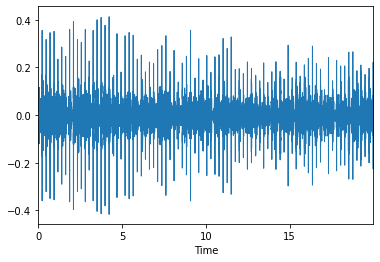

In [ ]:
data,sample_rate=librosa.load(path_audio_data+audio_file_1)
librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(path_audio_data+audio_file_1)

0it [00:00, ?it/s]

id                                     101
age                                      3
sex                                      F
adult bmi                              NaN
child weight                            19
child_height                            99
record_ind                             1b1
chest_loc                               Al
acquisition                             sc
record equip                      Meditron
file name       101_1b1_Al_sc_Meditron.txt
disease                               URTI
Name: 0, dtype: object


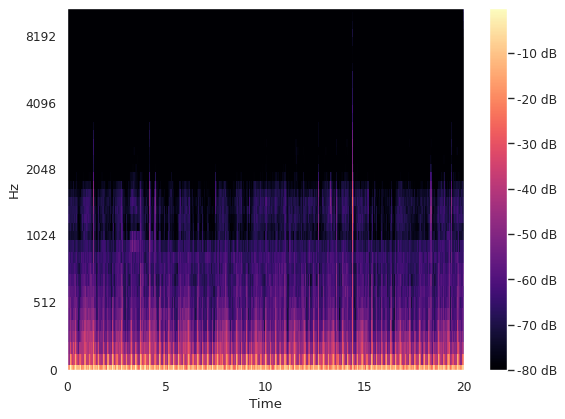

1it [00:03,  3.22s/it]

id                                     101
age                                      3
sex                                      F
adult bmi                              NaN
child weight                            19
child_height                            99
record_ind                             1b1
chest_loc                               Pr
acquisition                             sc
record equip                      Meditron
file name       101_1b1_Pr_sc_Meditron.txt
disease                               URTI
Name: 1, dtype: object


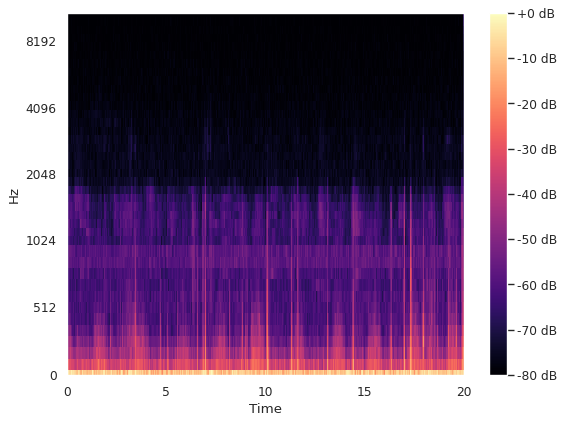

2it [00:05,  2.88s/it]

id                                     102
age                                   0.75
sex                                      F
adult bmi                              NaN
child weight                           9.8
child_height                            73
record_ind                             1b1
chest_loc                               Ar
acquisition                             sc
record equip                      Meditron
file name       102_1b1_Ar_sc_Meditron.txt
disease                            Healthy
Name: 2, dtype: object


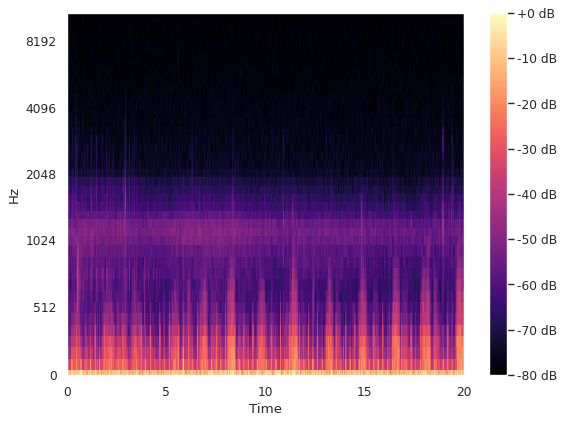

3it [00:07,  2.69s/it]

id                                     103
age                                     70
sex                                      F
adult bmi                               33
child weight                           NaN
child_height                           NaN
record_ind                             2b2
chest_loc                               Ar
acquisition                             mc
record equip                      LittC2SE
file name       103_2b2_Ar_mc_LittC2SE.txt
disease                             Asthma
Name: 3, dtype: object


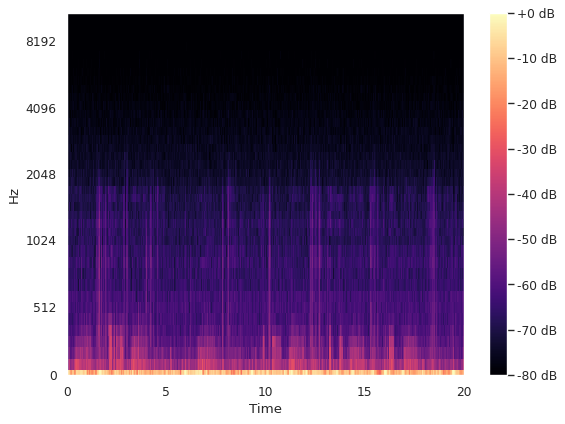

4it [00:09,  2.57s/it]

id                                     104
age                                     70
sex                                      F
adult bmi                            28.47
child weight                           NaN
child_height                           NaN
record_ind                             1b1
chest_loc                               Al
acquisition                             sc
record equip                      Litt3200
file name       104_1b1_Al_sc_Litt3200.txt
disease                               COPD
Name: 4, dtype: object


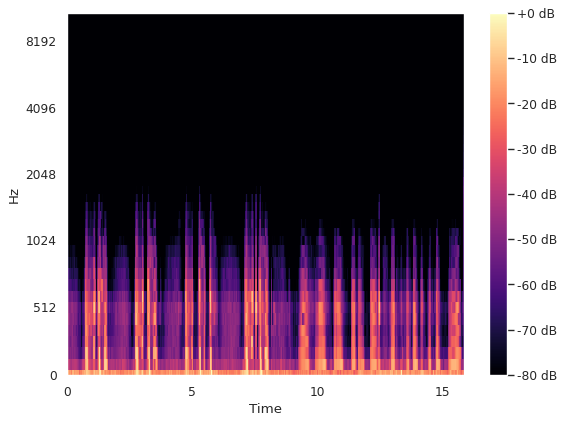

5it [00:11,  2.17s/it]

id                                     104
age                                     70
sex                                      F
adult bmi                            28.47
child weight                           NaN
child_height                           NaN
record_ind                             1b1
chest_loc                               Ar
acquisition                             sc
record equip                      Litt3200
file name       104_1b1_Ar_sc_Litt3200.txt
disease                               COPD
Name: 5, dtype: object


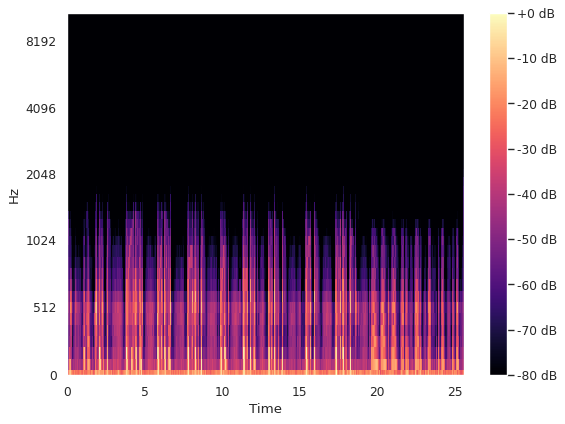

6it [00:12,  1.98s/it]

id                                     104
age                                     70
sex                                      F
adult bmi                            28.47
child weight                           NaN
child_height                           NaN
record_ind                             1b1
chest_loc                               Ll
acquisition                             sc
record equip                      Litt3200
file name       104_1b1_Ll_sc_Litt3200.txt
disease                               COPD
Name: 6, dtype: object


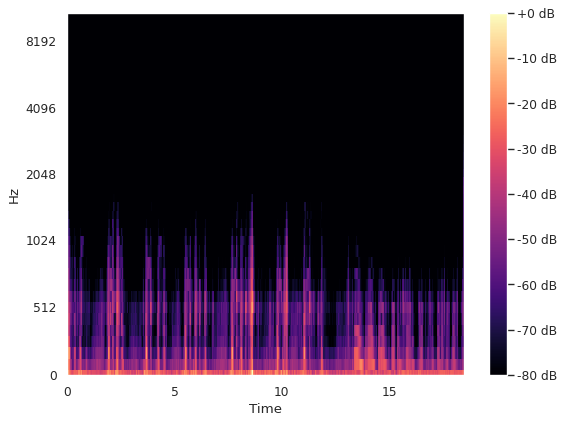

7it [00:13,  1.77s/it]

id                                     104
age                                     70
sex                                      F
adult bmi                            28.47
child weight                           NaN
child_height                           NaN
record_ind                             1b1
chest_loc                               Lr
acquisition                             sc
record equip                      Litt3200
file name       104_1b1_Lr_sc_Litt3200.txt
disease                               COPD
Name: 7, dtype: object


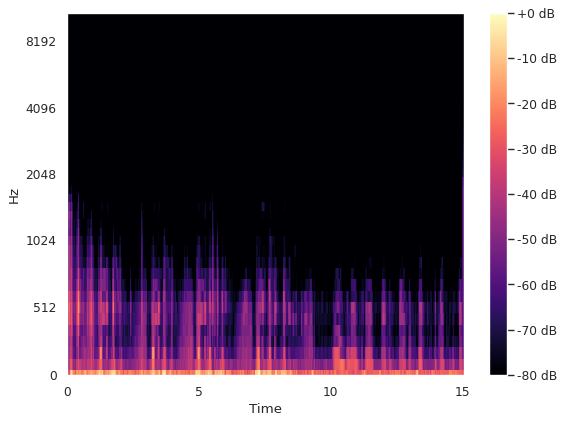

8it [00:15,  1.61s/it]

id                                     104
age                                     70
sex                                      F
adult bmi                            28.47
child weight                           NaN
child_height                           NaN
record_ind                             1b1
chest_loc                               Pl
acquisition                             sc
record equip                      Litt3200
file name       104_1b1_Pl_sc_Litt3200.txt
disease                               COPD
Name: 8, dtype: object


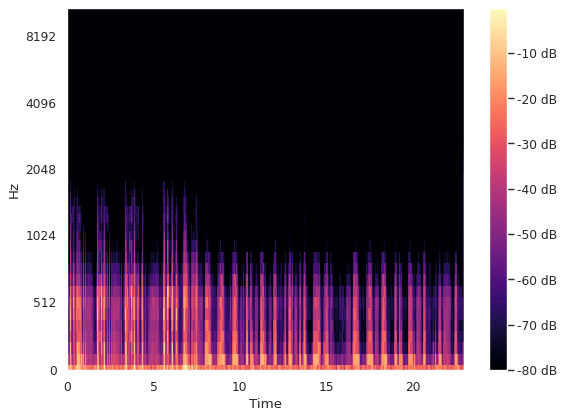

9it [00:16,  1.57s/it]

id                                     104
age                                     70
sex                                      F
adult bmi                            28.47
child weight                           NaN
child_height                           NaN
record_ind                             1b1
chest_loc                               Pr
acquisition                             sc
record equip                      Litt3200
file name       104_1b1_Pr_sc_Litt3200.txt
disease                               COPD
Name: 9, dtype: object


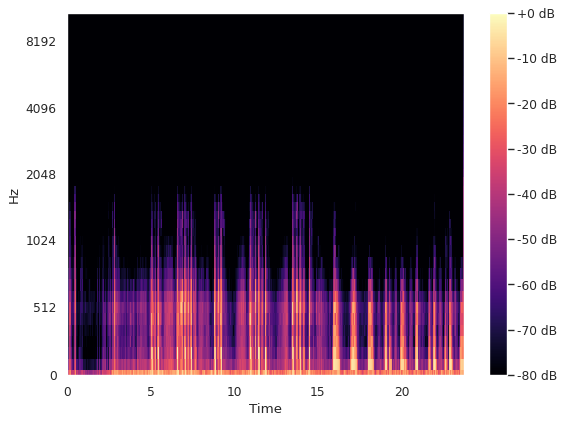

10it [00:18,  1.53s/it]

id                                     105
age                                      7
sex                                      F
adult bmi                              NaN
child weight                            32
child_height                           135
record_ind                             1b1
chest_loc                               Tc
acquisition                             sc
record equip                      Meditron
file name       105_1b1_Tc_sc_Meditron.txt
disease                               URTI
Name: 10, dtype: object


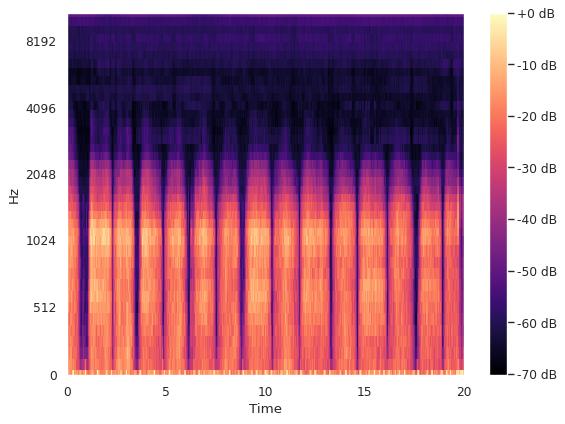

11it [00:20,  1.82s/it]

In [ ]:
import matplotlib.pyplot  as plt
from tqdm import tqdm
c=10;
for index_num,row in tqdm(patient_data.iterrows()):
 if c<0:
   break;
 c-=1
 print(row)
 data,sample_rate=librosa.load(path_audio_data+str(row["file name"])[0:-3]+'wav')
 plot(data,sample_rate)

In [ ]:
def plot(data,sample_rate):  
 whale_song, _ = librosa.effects.trim(data)
 S = librosa.feature.melspectrogram(whale_song, sr=sample_rate, n_fft=2048, hop_length=512, n_mels=40)
 S_DB = librosa.power_to_db(S, ref=np.max)
 figure(figsize=(8, 6), dpi=80)
 librosa.display.specshow(S_DB, sr=sample_rate, hop_length=512, x_axis='time', y_axis='mel');
 plt.colorbar(format='%+2.0f dB')
 plt.show()

# Clipping the audio file

In [ ]:
import seaborn as sns

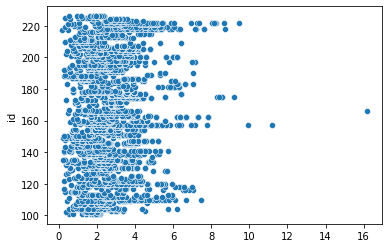

In [ ]:
sns.scatterplot(x=(patient_audio_txt_data.end-patient_audio_txt_data.start), y=patient_audio_txt_data.id)

In [ ]:
patient_audio_txt_data[patient_audio_txt_data["end"]-patient_audio_txt_data["start"]>=8]

# Seems 8 will be a good fit

start     end  crackles  ...  acquisition                    filename disease
3045  26.2090  36.124         0  ...           sc  157_1b1_Ar_sc_Meditron.txt    COPD
3046  36.1240  47.329         0  ...           sc  157_1b1_Ar_sc_Meditron.txt    COPD
3667  16.7030  32.866         0  ...           sc  166_1p1_Al_sc_Meditron.txt    COPD
4287  10.5760  18.864         1  ...           sc  175_1b1_Al_sc_Litt3200.txt    COPD
4290   7.7774  16.368         0  ...           sc  175_1b1_Ar_sc_Litt3200.txt    COPD
4294   9.6323  18.224         1  ...           sc  175_1b1_Ll_sc_Litt3200.txt    COPD
4298   8.8603  17.264         0  ...           sc  175_1b1_Lr_sc_Litt3200.txt    COPD
4302  12.4630  21.680         0  ...           sc  175_1b1_Pl_sc_Litt3200.txt    COPD
6564  40.0590  48.795         1  ...           sc  218_1b1_Lr_sc_Meditron.txt    COPD
6737  29.9480  39.386         0  ...           sc  222_1b1_Ar_sc_Meditron.txt    COPD
6738  39.3860  47.636         0  ...           sc  222_1b1_Ar_sc_Meditron.txt    COPD
6739  47.6360  55.705         0  ...           sc  222_1b1_Ar_sc_Meditron.txt    COPD
6740  55.7050  63.883         0  ...           sc  222_1b1_Ar_sc_Meditron.txt    COPD
6741  63.8830  72.024         0  ...           sc  222_1b1_Ar_sc_Meditron.txt    COPD
6769  31.4340  40.124         0  ...           sc  222_1b1_Pr_sc_Meditron.txt    COPD

[15 rows x 8 columns]

In [ ]:
patient_audio_txt_data[patient_audio_txt_data["end"]-patient_audio_txt_data["start"]>=16]

start     end  crackles  ...  acquisition                    filename disease
3667  16.703  32.866         0  ...           sc  166_1p1_Al_sc_Meditron.txt    COPD

[1 rows x 8 columns]

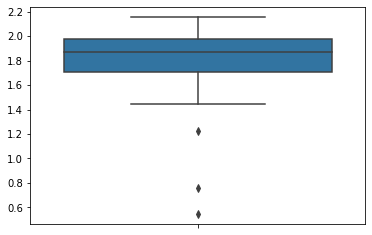

In [ ]:
df=patient_audio_txt_data[patient_audio_txt_data["id"]==101]
sns.boxplot(y=(df.end-df.start))

In [ ]:
# For cycles greater than 9
### 8 is a good fi
patient_audio_txt_data[patient_audio_txt_data["end"]-patient_audio_txt_data["start"]>=11]

start     end  crackles  ...  acquisition                    filename disease
3046  36.124  47.329         0  ...           sc  157_1b1_Ar_sc_Meditron.txt    COPD
3667  16.703  32.866         0  ...           sc  166_1p1_Al_sc_Meditron.txt    COPD

[2 rows x 8 columns]

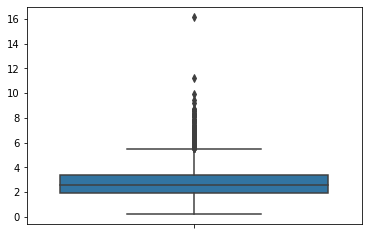

In [ ]:
sns.boxplot(y=(patient_audio_txt_data.end-patient_audio_txt_data.start))

In [ ]:
data,sample_rate=librosa.load(path_audio_data+"154_3b3_Al_mc_AKGC417L.wav")
librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(path_audio_data+"154_3b3_Al_mc_AKGC417L.wav")

In [ ]:
df=patient_audio_txt_data.copy()
df["respiratory period"]=df.end-df.start
df1=df.groupby(["id"])
df2=df1.mean()
#print(df2)
df.set_index(["id"],inplace=True)
df["mean period"]=df2["respiratory period"]
df
patient_audio_txt_data["respiratory cycle"]=patient_audio_txt_data.end-patient_audio_txt_data.start


In [ ]:
df1.mean()

Index(['start', 'end', 'crackles', 'wheezes', 'respiratory period'], dtype='object')

In [ ]:

patient_audio_txt_data=patient_audio_txt_data.merge(df1.mean()["respiratory period"].rename({"respiratory period":"mean cycle"}),how="inner",on="id")

In [ ]:
patient_audio_txt_data

start     end  ...  respiratory cycle  respiratory period
0      0.036   0.579  ...              0.543            1.731652
1      0.579   2.450  ...              1.871            1.731652
2      2.450   3.893  ...              1.443            1.731652
3      3.893   5.793  ...              1.900            1.731652
4      5.793   7.521  ...              1.728            1.731652
...      ...     ...  ...                ...                 ...
6893  11.721  13.693  ...              1.972            1.926710
6894  13.693  15.536  ...              1.843            1.926710
6895  15.536  17.493  ...              1.957            1.926710
6896  17.493  19.436  ...              1.943            1.926710
6897  19.436  19.979  ...              0.543            1.926710

[6898 rows x 10 columns]

In [ ]:
save_dir="/content/drive/MyDrive/processed_audio_files"

In [ ]:
os.makedirs(save_dir)

In [ ]:
patient_audio_txt_data["processed files"]=""
patient_audio_txt_data

start     end  ...  respiratory period  processed files
0      0.036   0.579  ...            1.731652                 
1      0.579   2.450  ...            1.731652                 
2      2.450   3.893  ...            1.731652                 
3      3.893   5.793  ...            1.731652                 
4      5.793   7.521  ...            1.731652                 
...      ...     ...  ...                 ...              ...
6893  11.721  13.693  ...            1.926710                 
6894  13.693  15.536  ...            1.926710                 
6895  15.536  17.493  ...            1.926710                 
6896  17.493  19.436  ...            1.926710                 
6897  19.436  19.979  ...            1.926710                 

[6898 rows x 11 columns]

In [ ]:
def getPureSample(raw_data,start,end,sr=22050):
    '''
    Takes a numpy array and spilts its using start and end args
    
    raw_data=numpy array of audio sample
    start=time
    end=time
    sr=sampling_rate
    mode=mono/stereo
    
    '''
    max_ind = len(raw_data) 
    start_ind = min(int(start * sr), max_ind)
    end_ind = min(int(end * sr), max_ind)
    return raw_data[start_ind: end_ind]

In [ ]:
import librosa as lb
import soundfile as sf
from tqdm.notebook import tqdm
file_dict={}
i,c=0,0
for index,row in tqdm(patient_audio_txt_data.iterrows()):
    maxLen=6
    start=row['start']
    end=row['end']
    filename=row['filename'][0:-4]
    
    #If len > maxLen , change it to maxLen
    if end-start>maxLen:
        end=start+maxLen
    
    audio_file_loc=path_audio_data + filename + '.wav'
    
    if file_dict.get(filename) is None:
      file_dict[filename]=0
    file_dict[filename]+=1
    filename= filename + '_' + str(file_dict[filename]) + '.wav'
    patient_audio_txt_data.loc[index,"processed files"]=filename
    save_path=save_dir+"/" + filename
    c+=1
    
    audioArr,sampleRate=lb.load(audio_file_loc)
    pureSample=getPureSample(audioArr,start,end,sampleRate)
    
    #pad audio if pureSample len < max_len
    reqLen=6*sampleRate
    padded_data = lb.util.pad_center(pureSample, reqLen)
    
    sf.write(file=save_path,data=padded_data,samplerate=sampleRate)
print('Total Files Processed: ',c)


Total Files Processed:  6898


In [ ]:
### Wav files of duration is saved in the folder processed_audio_files8

In [ ]:
patient_audio_txt_data.to_csv("/content/drive/MyDrive/sample_data/Prepro6.csv")

In [ ]:
file_dict.size

NameError: ignored

# Graphical Representation of Data

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import numpy as np

In [ ]:
path_csv_data="/content/drive/MyDrive/sample_data/"

In [ ]:
patient_audio_data=pd.read_csv(path_csv_data+"Prepro6.csv")
patient_audio_data.drop(columns=["Unnamed: 0"],inplace=True)
patient_audio_data.head(5)

start    end  ...  respiratory period               processed files
0  0.036  0.579  ...            1.731652  101_1b1_Al_sc_Meditron_1.wav
1  0.579  2.450  ...            1.731652  101_1b1_Al_sc_Meditron_2.wav
2  2.450  3.893  ...            1.731652  101_1b1_Al_sc_Meditron_3.wav
3  3.893  5.793  ...            1.731652  101_1b1_Al_sc_Meditron_4.wav
4  5.793  7.521  ...            1.731652  101_1b1_Al_sc_Meditron_5.wav

[5 rows x 11 columns]

In [ ]:
patient_demo=pd.read_excel(path_csv_data+"Final_Data.xlsx")
patient_demo.head(5)

id    age sex  ...  record equip                   file name  disease
0  101   3.00   F  ...      Meditron  101_1b1_Al_sc_Meditron.txt     URTI
1  101   3.00   F  ...      Meditron  101_1b1_Pr_sc_Meditron.txt     URTI
2  102   0.75   F  ...      Meditron  102_1b1_Ar_sc_Meditron.txt  Healthy
3  103  70.00   F  ...      LittC2SE  103_2b2_Ar_mc_LittC2SE.txt   Asthma
4  104  70.00   F  ...      Litt3200  104_1b1_Al_sc_Litt3200.txt     COPD

[5 rows x 12 columns]

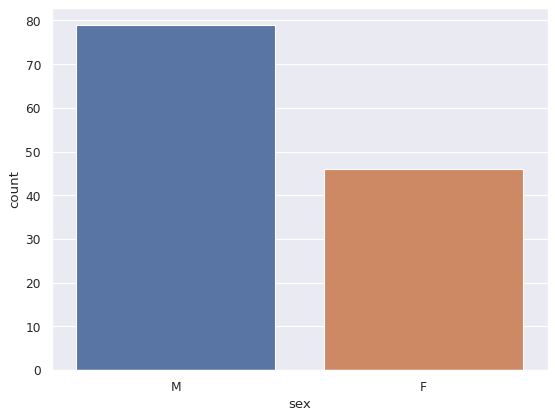

In [ ]:
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=80)
sns.set(style='darkgrid')
graph_s=pd.read_csv("/content/drive/MyDrive/sample_data/demographic_info.txt",sep=" ",names=["id","age","sex","adult bmi","child weight","child_height"])
sns.countplot(x="sex",data=graph_s,order=graph_s["sex"].value_counts().index)
plt.show()

## Sex distribution

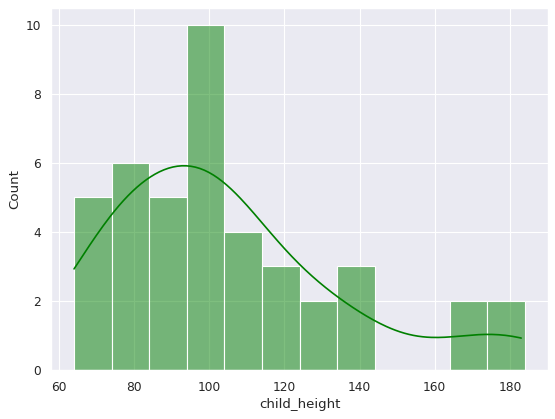

In [ ]:
### Showing height distribution in dataset
figure(figsize=(8, 6), dpi=80)
sns.histplot(x="child_height",data=child_adult_demo,color="green", binwidth=10,kde=True)
plt.show()

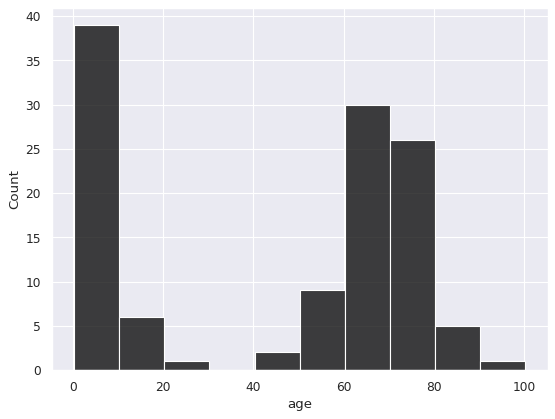

In [ ]:
figure(figsize=(8, 6), dpi=80)
sns.histplot(x="age",data=child_adult_demo,color="black", binwidth=10)
plt.show()

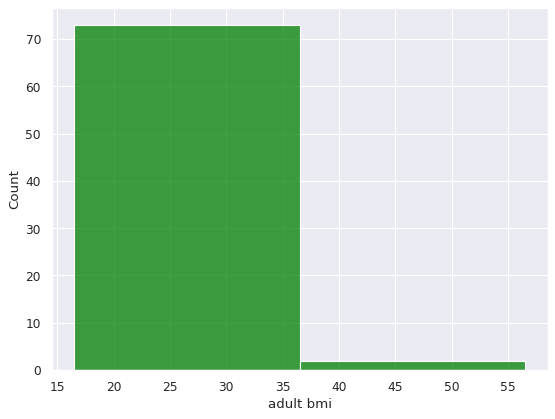

In [ ]:
figure(figsize=(8, 6), dpi=80)
sns.histplot(x="adult bmi",data=child_adult_demo,color="green", binwidth=20)
plt.show()

In [ ]:
patient_demo[child_adult_demo["adult bmi"]>37]

id   age sex  ...  record equip                   file name  disease
379  157  62.0   M  ...      Meditron  157_1b1_Al_sc_Meditron.txt     COPD
380  157  62.0   M  ...      Meditron  157_1b1_Ar_sc_Meditron.txt     COPD
381  157  62.0   M  ...      Meditron  157_1b1_Lr_sc_Meditron.txt     COPD
382  157  62.0   M  ...      Meditron  157_1b1_Pl_sc_Meditron.txt     COPD
383  157  62.0   M  ...      Meditron  157_1b1_Pr_sc_Meditron.txt     COPD

[5 rows x 12 columns]

In [ ]:
child_adult_demo

id    age sex  adult bmi  child weight  child_height
0    101   3.00   F        NaN          19.0          99.0
1    102   0.75   F        NaN           9.8          73.0
2    103  70.00   F      33.00           NaN           NaN
3    104  70.00   F      28.47           NaN           NaN
4    105   7.00   F        NaN          32.0         135.0
..   ...    ...  ..        ...           ...           ...
119  220  66.00   M      35.40           NaN           NaN
120  221  74.00   F      29.00           NaN           NaN
123  224  10.00   F        NaN          32.3         143.0
124  225   0.83   M        NaN           7.8          74.0
125  226   4.00   M        NaN          16.7         103.0

[119 rows x 6 columns]

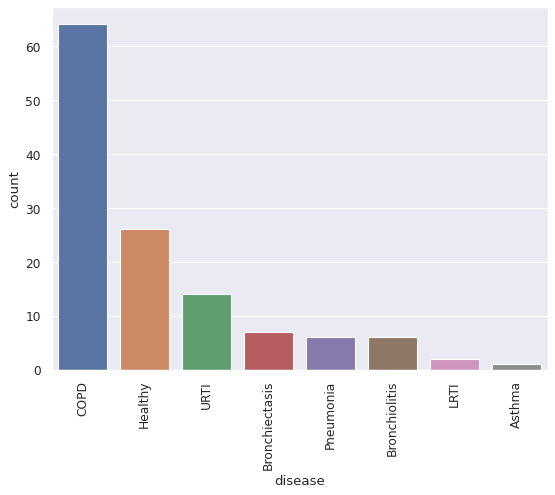

In [ ]:
patient_diag=pd.read_csv("/content/drive/MyDrive/sample_data/Respiratory_Sound_Database/Respiratory_Sound_Database/patient_diagnosis.csv",names=["id","disease"])
sns.set(style='darkgrid')
figure(figsize=(8, 6), dpi=80)
sns.countplot(x='disease',data=patient_diag,order=patient_diag["disease"].value_counts().index)
plt.xticks(rotation=90)
plt.show()

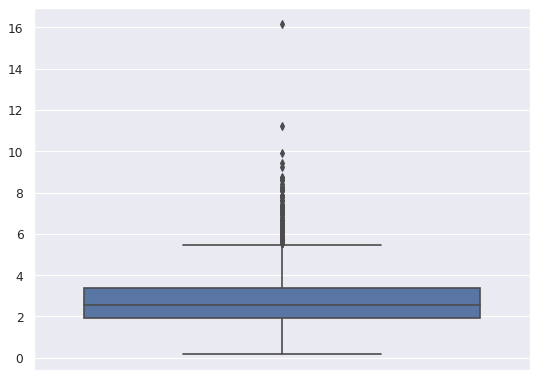

In [ ]:
# Respiratory cycle length
figure(figsize=(8, 6), dpi=80)
sns.boxplot(y=(patient_audio_txt_data.end-patient_audio_txt_data.start))

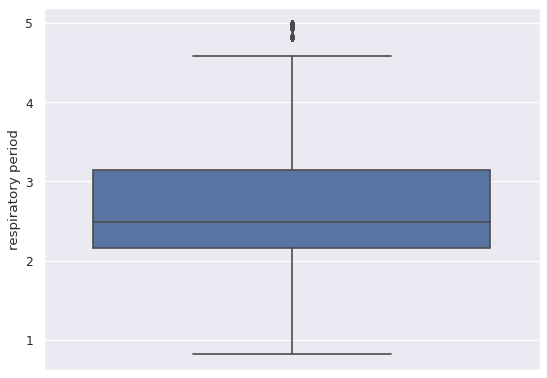

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/sample_data/Prepro6.csv").drop(columns=["Unnamed: 0"])
figure(figsize=(8, 6), dpi=80)
sns.boxplot(y=(df["respiratory period"]))

### Mean respiratory period box plot

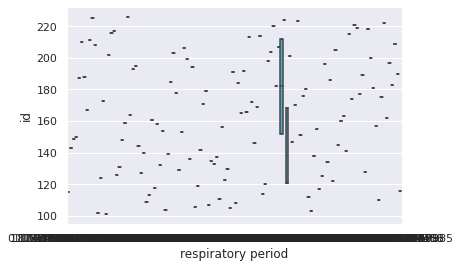

In [ ]:
##figure(figsize=(8, 6), dpi=80)
sns.boxplot(x=(df["respiratory period"]),y=df.id)
plt.show()

# Taking a view of the processed data

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
path_to_processed_file="/content/drive/MyDrive/sample_data/Prepro6.csv"

In [ ]:
df=pd.read_csv(path_to_processes_file).drop(columns=["Unnamed: 0"])

NameError: ignored

start     end  ...  respiratory period                processed files
0      0.036   0.579  ...            1.731652   101_1b1_Al_sc_Meditron_1.wav
1      0.579   2.450  ...            1.731652   101_1b1_Al_sc_Meditron_2.wav
2      2.450   3.893  ...            1.731652   101_1b1_Al_sc_Meditron_3.wav
3      3.893   5.793  ...            1.731652   101_1b1_Al_sc_Meditron_4.wav
4      5.793   7.521  ...            1.731652   101_1b1_Al_sc_Meditron_5.wav
...      ...     ...  ...                 ...                            ...
6893  11.721  13.693  ...            1.926710   226_1b1_Pl_sc_LittC2SE_7.wav
6894  13.693  15.536  ...            1.926710   226_1b1_Pl_sc_LittC2SE_8.wav
6895  15.536  17.493  ...            1.926710   226_1b1_Pl_sc_LittC2SE_9.wav
6896  17.493  19.436  ...            1.926710  226_1b1_Pl_sc_LittC2SE_10.wav
6897  19.436  19.979  ...            1.926710  226_1b1_Pl_sc_LittC2SE_11.wav

[6898 rows x 11 columns]

# Splitting the data into Test and train

In [ ]:
path_to_processed_file="/content/drive/MyDrive/sample_data/Prepro6.csv"
data=pd.read_csv(path_to_processed_file).drop(columns=["Unnamed: 0"])

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain,Xval,ytrain,yval=train_test_split(data,data.disease,stratify=data.disease,random_state=42,test_size=0.25)

NameError: ignored

In [ ]:
Xtrain

start     end  ...  respiratory period               processed files
1650   1.066   3.554  ...            2.339378  133_2p4_Pr_mc_AKGC417L_1.wav
2672  17.607  19.964  ...            2.846857  152_1b1_Al_sc_Meditron_7.wav
548   26.652  30.000  ...            3.193902  112_1p1_Pr_sc_Litt3200_9.wav
4733  14.821  17.407  ...            2.227533  179_1b1_Al_sc_Meditron_7.wav
1438  17.389  18.796  ...            2.474515  130_3p2_Ar_mc_AKGC417L_7.wav
...      ...     ...  ...                 ...                           ...
2832   4.363   6.295  ...            2.098707  154_4b4_Al_mc_AKGC417L_3.wav
2267   7.601  11.637  ...            2.735688  146_2b4_Pr_mc_AKGC417L_3.wav
5955   1.480   5.594  ...            3.503559  205_2b3_Ar_mc_AKGC417L_1.wav
6251   0.109   1.702  ...            1.404730  211_1p2_Pr_mc_AKGC417L_1.wav
2009   1.644   3.180  ...            3.285423  138_2p2_Pr_mc_AKGC417L_1.wav

[5173 rows x 11 columns]

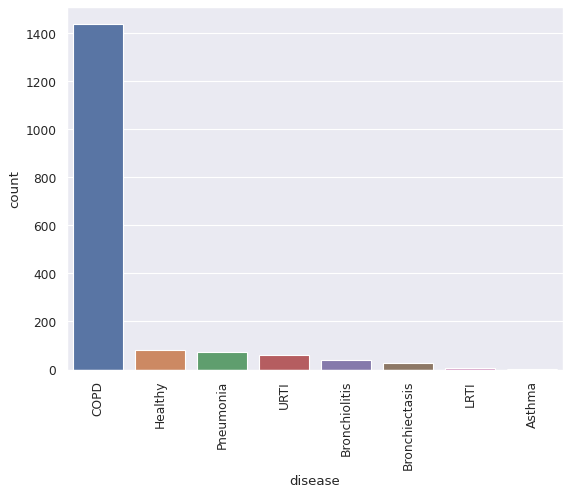

In [ ]:
#Plotting Xval
from matplotlib.pyplot import figure
sns.set(style='darkgrid')
figure(figsize=(8, 6), dpi=80)
sns.countplot(x='disease',data=Xval,order=Xval["disease"].value_counts().index)
plt.xticks(rotation=90)
plt.show()

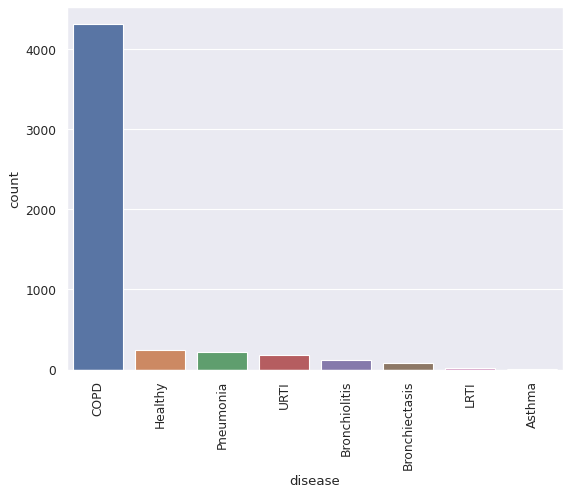

In [ ]:
#Plotting Xtrain
from matplotlib.pyplot import figure
sns.set(style='darkgrid')
figure(figsize=(8, 6), dpi=80)
sns.countplot(x='disease',data=Xtrain,order=Xtrain["disease"].value_counts().index)
plt.xticks(rotation=90)
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
ytrain=le.fit_transform(ytrain)
yval=le.transform(yval)

array([3, 4, 3, ..., 3, 3, 3])

# Feature Extraction and applying CNN

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import librosa as lb
import librosa.display as lbd
import os
import numpy as np
from tqdm import tqdm

In [ ]:
def features_extractor(path):
    soundArr,sample_rate=lb.load(path)
    mfcc=lb.feature.mfcc(y=soundArr,sr=sample_rate)
    cstft=lb.feature.chroma_stft(y=soundArr,sr=sample_rate)
    mSpec=lb.feature.melspectrogram(y=soundArr,sr=sample_rate)

    return mfcc,cstft,mSpec

In [ ]:
path_to_processed_file="/content/drive/MyDrive/sample_data/Prepro6.csv"
path_audio_data="/content/drive/MyDrive/processed_audio_files/"
#df=pd.read_csv(path_to_processed_file).drop(columns=["Unnamed: 0"])
mfcc,cstft,mSpec=[],[],[]
for index_num,row in tqdm(Xtrain.iterrows()):
    file_name = os.path.join(os.path.abspath(path_audio_data),str(row["processed files"])[0:-3]+'wav')
    a,b,c=features_extractor(file_name)
    mfcc.append(a)
    cstft.append(b)
    mSpec.append(c)
mfcc_train=np.array(mfcc)
cstft_train=np.array(cstft)
mSpec_train=np.array(mSpec)

1it [00:00,  1.74it/s]/usr/local/lib/python3.7/dist-packages/librosa/core/pitch.py:153: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn("Trying to estimate tuning from empty frequency set.")
2760it [25:41,  1.52it/s]

In [ ]:

path_to_processed_file="/content/drive/MyDrive/sample_data/Prepro6.csv"
path_audio_data="/content/drive/MyDrive/processed_audio_files/"
#df=pd.read_csv(path_to_processed_file).drop(columns=["Unnamed: 0"])
mfcc,cstft,mSpec=[],[],[]
for index_num,row in tqdm(Xval.iterrows()):
    file_name = os.path.join(os.path.abspath(path_audio_data),str(row["processed files"])[0:-3]+'wav')
    a,b,c=features_extractor(file_name)
    mfcc.append(a)
    cstft.append(b)
    mSpec.append(c)
mfcc_val=np.array(mfcc)
cstft_val=np.array(cstft)
mSpec_val=np.array(mSpec)

2it [00:00,  3.74it/s]/usr/local/lib/python3.7/dist-packages/librosa/core/pitch.py:153: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn("Trying to estimate tuning from empty frequency set.")
1725it [07:44,  3.72it/s]


In [ ]:
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=5),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=3, min_lr=0.00001,mode='min')
]

In [ ]:
mfcc_input=keras.layers.Input(shape=(20,259,1),name="mfccInput")
x=keras.layers.Conv2D(32,5,strides=(1,3),padding='same')(mfcc_input)
x=keras.layers.BatchNormalization()(x)
x=keras.layers.Activation(keras.activations.relu)(x)
x=keras.layers.MaxPooling2D(pool_size=2,padding='valid')(x)

x=keras.layers.Conv2D(64,3,strides=(1,2),padding='same')(x)
x=keras.layers.BatchNormalization()(x)
x=keras.layers.Activation(keras.activations.relu)(x)
x=keras.layers.MaxPooling2D(pool_size=2,padding='valid')(x)

x=keras.layers.Conv2D(96,2,padding='same')(x)
x=keras.layers.BatchNormalization()(x)
x=keras.layers.Activation(keras.activations.relu)(x)
x=keras.layers.MaxPooling2D(pool_size=2,padding='valid')(x)

x=keras.layers.Conv2D(128,2,padding='same')(x)
x=keras.layers.BatchNormalization()(x)
x=keras.layers.Activation(keras.activations.relu)(x)
mfcc_output=keras.layers.GlobalMaxPooling2D()(x)

mfcc_model=keras.Model(mfcc_input, mfcc_output, name="mfccModel")

In [ ]:
mfcc_model.summary()

Model: "mfccModel"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mfccInput (InputLayer)       [(None, 20, 259, 1)]      0         
_________________________________________________________________
conv2d (Conv2D)              (None, 20, 87, 32)        832       
_________________________________________________________________
batch_normalization (BatchNo (None, 20, 87, 32)        128       
_________________________________________________________________
activation (Activation)      (None, 20, 87, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 10, 43, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 22, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 10, 22, 64)        25

In [ ]:
croma_input=keras.layers.Input(shape=(12,259,1),name="cromaInput")
x=keras.layers.Conv2D(32,5,strides=(1,3),padding='same')(croma_input)
x=keras.layers.BatchNormalization()(x)
x=keras.layers.Activation(keras.activations.relu)(x)
x=keras.layers.MaxPooling2D(pool_size=2,padding='valid')(x)

x=keras.layers.Conv2D(64,3,strides=(1,2),padding='same')(x)
x=keras.layers.BatchNormalization()(x)
x=keras.layers.Activation(keras.activations.relu)(x)
x=keras.layers.MaxPooling2D(pool_size=2,padding='valid')(x)

x=keras.layers.Conv2D(128,2,padding='same')(x)
x=keras.layers.BatchNormalization()(x)
x=keras.layers.Activation(keras.activations.relu)(x)
croma_output=keras.layers.GlobalMaxPooling2D()(x)

croma_model=keras.Model(croma_input, croma_output, name="cromaModel")

In [ ]:
croma_model.summary()

Model: "cromaModel"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cromaInput (InputLayer)      [(None, 12, 259, 1)]      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 12, 87, 32)        832       
_________________________________________________________________
batch_normalization_4 (Batch (None, 12, 87, 32)        128       
_________________________________________________________________
activation_4 (Activation)    (None, 12, 87, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 43, 32)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 6, 22, 64)         18496     
_________________________________________________________________
batch_normalization_5 (Batch (None, 6, 22, 64)         2

In [ ]:
mSpec_input=keras.layers.Input(shape=(128,259,1),name="mSpecInput")
x=keras.layers.Conv2D(32,5,strides=(2,3),padding='same')(mSpec_input)
x=keras.layers.BatchNormalization()(x)
x=keras.layers.Activation(keras.activations.relu)(x)
x=keras.layers.MaxPooling2D(pool_size=2,padding='valid')(x)

x=keras.layers.Conv2D(64,3,strides=(2,2),padding='same')(x)
x=keras.layers.BatchNormalization()(x)
x=keras.layers.Activation(keras.activations.relu)(x)
x=keras.layers.MaxPooling2D(pool_size=2,padding='valid')(x)

x=keras.layers.Conv2D(96,2,padding='same')(x)
x=keras.layers.BatchNormalization()(x)
x=keras.layers.Activation(keras.activations.relu)(x)
x=keras.layers.MaxPooling2D(pool_size=2,padding='valid')(x)

x=keras.layers.Conv2D(128,2,padding='same')(x)
x=keras.layers.BatchNormalization()(x)
x=keras.layers.Activation(keras.activations.relu)(x)
mSpec_output=keras.layers.GlobalMaxPooling2D()(x)

mSpec_model=keras.Model(mSpec_input, mSpec_output, name="mSpecModel")

In [ ]:
mSpec_model.summary()

Model: "mSpecModel"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mSpecInput (InputLayer)      [(None, 128, 259, 1)]     0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 64, 87, 32)        832       
_________________________________________________________________
batch_normalization_7 (Batch (None, 64, 87, 32)        128       
_________________________________________________________________
activation_7 (Activation)    (None, 64, 87, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 32, 43, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 22, 64)        18496     
_________________________________________________________________
batch_normalization_8 (Batch (None, 16, 22, 64)        2

In [ ]:
input_mfcc=keras.layers.Input(shape=(20,259,1),name="mfcc")
mfcc=mfcc_model(input_mfcc)

input_croma=keras.layers.Input(shape=(12,259,1),name="croma")
croma=croma_model(input_croma)

input_mSpec=keras.layers.Input(shape=(128,259,1),name="mspec")
mSpec=mSpec_model(input_mSpec)


concat=keras.layers.concatenate([mfcc,croma,mSpec])
hidden=keras.layers.Dropout(0.2)(concat)
hidden=keras.layers.Dense(50,activation='relu')(concat)
hidden=keras.layers.Dropout(0.3)(hidden)
hidden=keras.layers.Dense(25,activation='relu')(hidden)
hidden=keras.layers.Dropout(0.3)(hidden)
output=keras.layers.Dense(8,activation='softmax')(hidden)

net=keras.Model([input_mfcc,input_croma,input_mSpec], output, name="Net")

In [ ]:
net.summary()

Model: "Net"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
mfcc (InputLayer)               [(None, 20, 259, 1)] 0                                            
__________________________________________________________________________________________________
croma (InputLayer)              [(None, 12, 259, 1)] 0                                            
__________________________________________________________________________________________________
mspec (InputLayer)              [(None, 128, 259, 1) 0                                            
__________________________________________________________________________________________________
mfccModel (Functional)          (None, 128)          94560       mfcc[0][0]                       
________________________________________________________________________________________________

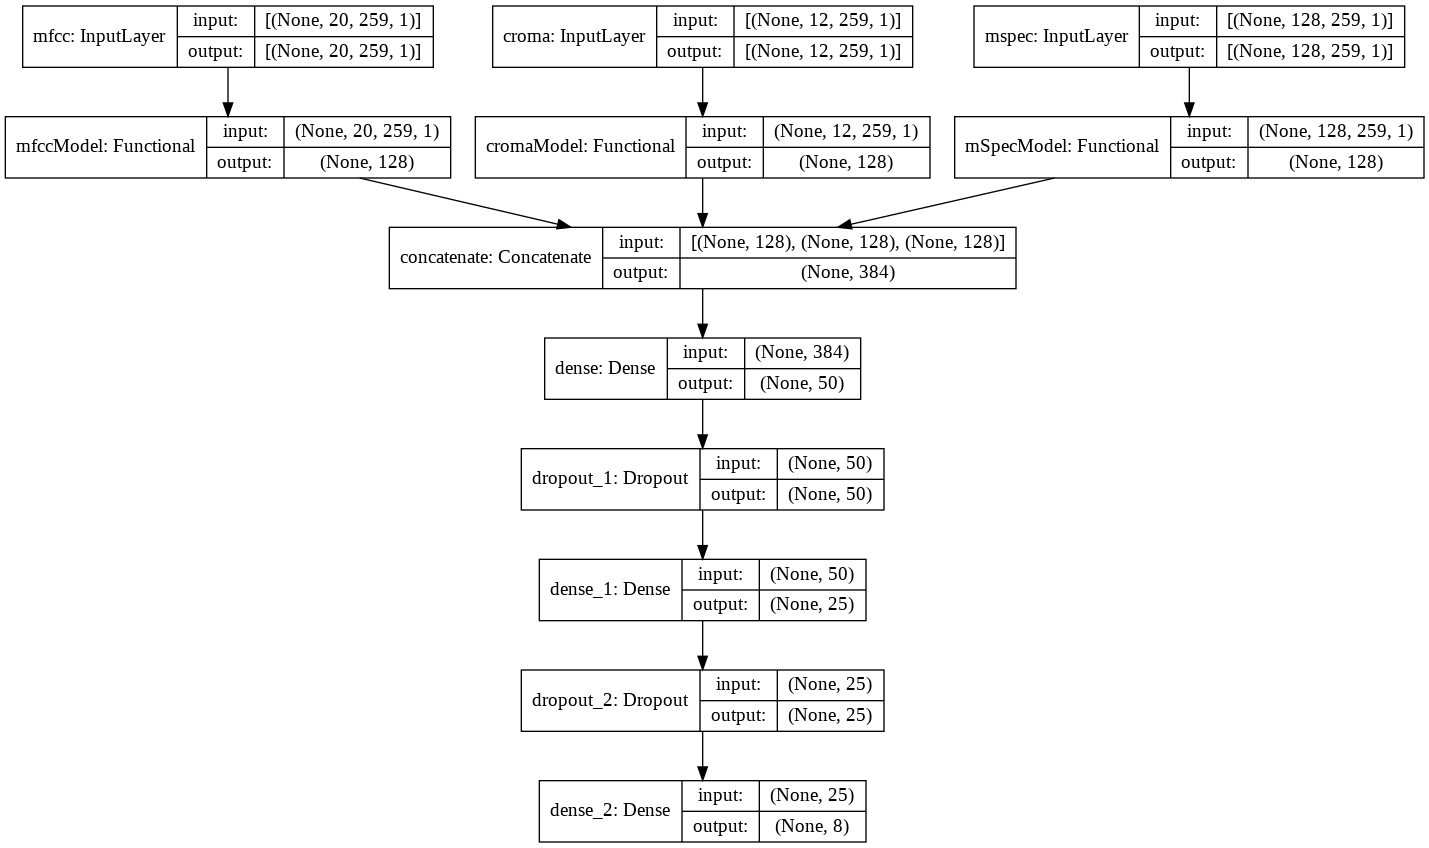

In [ ]:
keras.utils.plot_model(net, "net.png", show_shapes=True)

In [ ]:
from keras import backend as K
net.compile(loss='sparse_categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])
K.set_value(net.optimizer.learning_rate, 0.001)

In [ ]:
history=net.fit(
    {"mfcc":mfcc_train,"croma":cstft_train,"mspec":mSpec_train},
    ytrain,
    validation_data=({"mfcc":mfcc_val,"croma":cstft_val,"mspec":mSpec_val},yval),
    epochs=100,verbose=0,
    callbacks=my_callbacks
)

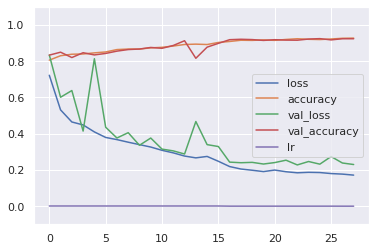

In [ ]:
pd.DataFrame(history.history).plot()
plt.grid(True)
plt.gca().set_ylim(-0.1,1.1)
plt.show()

In [ ]:
net.evaluate({"mfcc":mfcc_val,"croma":cstft_val,"mspec":mSpec_val},yval)

54/54 [==============================] - 6s 115ms/step - loss: 0.2299 - accuracy: 0.9241


[0.22989918291568756, 0.9240579605102539]

# With Another Dataset

In [ ]:

path_to_processed_file="/content/drive/MyDrive/sample_data/Prepro6.csv"
path_audio_data="/content/drive/MyDrive/processed_audio_files8/"
#df=pd.read_csv(path_to_processed_file).drop(columns=["Unnamed: 0"])
mfcc,cstft,mSpec=[],[],[]
for index_num,row in tqdm(Xtrain.iterrows()):
    file_name = os.path.join(os.path.abspath(path_audio_data),str(row["processed files"])[0:-3]+'wav')
    a,b,c=features_extractor(file_name)
    mfcc.append(a)
    cstft.append(b)
    mSpec.append(c)
mfcc_train8=np.array(mfcc)
cstft_train8=np.array(cstft)
mSpec_train8=np.array(mSpec)

1it [00:00,  3.45it/s]/usr/local/lib/python3.7/dist-packages/librosa/core/pitch.py:153: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn("Trying to estimate tuning from empty frequency set.")
5173it [23:08,  3.73it/s]


In [ ]:

path_to_processed_file="/content/drive/MyDrive/sample_data/Prepro6.csv"
path_audio_data="/content/drive/MyDrive/processed_audio_files8/"
#df=pd.read_csv(path_to_processed_file).drop(columns=["Unnamed: 0"])
mfcc,cstft,mSpec=[],[],[]
for index_num,row in tqdm(Xval.iterrows()):
    file_name = os.path.join(os.path.abspath(path_audio_data),str(row["processed files"])[0:-3]+'wav')
    a,b,c=features_extractor(file_name)
    mfcc.append(a)
    cstft.append(b)
    mSpec.append(c)
mfcc_val8=np.array(mfcc)
cstft_val8=np.array(cstft)
mSpec_val8=np.array(mSpec)

2it [00:00,  3.71it/s]/usr/local/lib/python3.7/dist-packages/librosa/core/pitch.py:153: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn("Trying to estimate tuning from empty frequency set.")
1725it [07:35,  3.79it/s]


In [ ]:
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=5),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=3, min_lr=0.00001,mode='min')
]

In [ ]:
mfcc_input=keras.layers.Input(shape=(20,345,1),name="mfccInput")
x=keras.layers.Conv2D(32,5,strides=(1,3),padding='same')(mfcc_input)
x=keras.layers.BatchNormalization()(x)
x=keras.layers.Activation(keras.activations.relu)(x)
x=keras.layers.MaxPooling2D(pool_size=2,padding='valid')(x)

x=keras.layers.Conv2D(64,3,strides=(1,2),padding='same')(x)
x=keras.layers.BatchNormalization()(x)
x=keras.layers.Activation(keras.activations.relu)(x)
x=keras.layers.MaxPooling2D(pool_size=2,padding='valid')(x)

x=keras.layers.Conv2D(96,2,padding='same')(x)
x=keras.layers.BatchNormalization()(x)
x=keras.layers.Activation(keras.activations.relu)(x)
x=keras.layers.MaxPooling2D(pool_size=2,padding='valid')(x)

x=keras.layers.Conv2D(128,2,padding='same')(x)
x=keras.layers.BatchNormalization()(x)
x=keras.layers.Activation(keras.activations.relu)(x)
mfcc_output=keras.layers.GlobalMaxPooling2D()(x)

mfcc_model=keras.Model(mfcc_input, mfcc_output, name="mfccModel")

In [ ]:
mfcc_model.summary()

Model: "mfccModel"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mfccInput (InputLayer)       [(None, 20, 345, 1)]      0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 20, 115, 32)       832       
_________________________________________________________________
batch_normalization_11 (Batc (None, 20, 115, 32)       128       
_________________________________________________________________
activation_11 (Activation)   (None, 20, 115, 32)       0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 10, 57, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 10, 29, 64)        18496     
_________________________________________________________________
batch_normalization_12 (Batc (None, 10, 29, 64)        25

In [ ]:
croma_input=keras.layers.Input(shape=(12,345,1),name="cromaInput")
x=keras.layers.Conv2D(32,5,strides=(1,3),padding='same')(croma_input)
x=keras.layers.BatchNormalization()(x)
x=keras.layers.Activation(keras.activations.relu)(x)
x=keras.layers.MaxPooling2D(pool_size=2,padding='valid')(x)

x=keras.layers.Conv2D(64,3,strides=(1,2),padding='same')(x)
x=keras.layers.BatchNormalization()(x)
x=keras.layers.Activation(keras.activations.relu)(x)
x=keras.layers.MaxPooling2D(pool_size=2,padding='valid')(x)

x=keras.layers.Conv2D(128,2,padding='same')(x)
x=keras.layers.BatchNormalization()(x)
x=keras.layers.Activation(keras.activations.relu)(x)
croma_output=keras.layers.GlobalMaxPooling2D()(x)

croma_model=keras.Model(croma_input, croma_output, name="cromaModel")

In [ ]:
croma_model.summary()

Model: "cromaModel"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cromaInput (InputLayer)      [(None, 12, 345, 1)]      0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 12, 115, 32)       832       
_________________________________________________________________
batch_normalization_15 (Batc (None, 12, 115, 32)       128       
_________________________________________________________________
activation_15 (Activation)   (None, 12, 115, 32)       0         
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 6, 57, 32)         0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 6, 29, 64)         18496     
_________________________________________________________________
batch_normalization_16 (Batc (None, 6, 29, 64)         2

In [ ]:
mSpec_input=keras.layers.Input(shape=(128,345,1),name="mSpecInput")
x=keras.layers.Conv2D(32,5,strides=(2,3),padding='same')(mSpec_input)
x=keras.layers.BatchNormalization()(x)
x=keras.layers.Activation(keras.activations.relu)(x)
x=keras.layers.MaxPooling2D(pool_size=2,padding='valid')(x)

x=keras.layers.Conv2D(64,3,strides=(2,2),padding='same')(x)
x=keras.layers.BatchNormalization()(x)
x=keras.layers.Activation(keras.activations.relu)(x)
x=keras.layers.MaxPooling2D(pool_size=2,padding='valid')(x)

x=keras.layers.Conv2D(96,2,padding='same')(x)
x=keras.layers.BatchNormalization()(x)
x=keras.layers.Activation(keras.activations.relu)(x)
x=keras.layers.MaxPooling2D(pool_size=2,padding='valid')(x)

x=keras.layers.Conv2D(128,2,padding='same')(x)
x=keras.layers.BatchNormalization()(x)
x=keras.layers.Activation(keras.activations.relu)(x)
mSpec_output=keras.layers.GlobalMaxPooling2D()(x)

mSpec_model=keras.Model(mSpec_input, mSpec_output, name="mSpecModel")

In [ ]:
mSpec_model.summary()

Model: "mSpecModel"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mSpecInput (InputLayer)      [(None, 128, 345, 1)]     0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 64, 115, 32)       832       
_________________________________________________________________
batch_normalization_18 (Batc (None, 64, 115, 32)       128       
_________________________________________________________________
activation_18 (Activation)   (None, 64, 115, 32)       0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 32, 57, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 16, 29, 64)        18496     
_________________________________________________________________
batch_normalization_19 (Batc (None, 16, 29, 64)        2

In [ ]:
input_mfcc=keras.layers.Input(shape=(20,345,1),name="mfcc")
mfcc=mfcc_model(input_mfcc)

input_croma=keras.layers.Input(shape=(12,345,1),name="croma")
croma=croma_model(input_croma)

input_mSpec=keras.layers.Input(shape=(128,345,1),name="mspec")
mSpec=mSpec_model(input_mSpec)


concat=keras.layers.concatenate([mfcc,croma,mSpec])
hidden=keras.layers.Dropout(0.2)(concat)
hidden=keras.layers.Dense(50,activation='relu')(concat)
hidden=keras.layers.Dropout(0.3)(hidden)
hidden=keras.layers.Dense(25,activation='relu')(hidden)
hidden=keras.layers.Dropout(0.3)(hidden)
output=keras.layers.Dense(8,activation='softmax')(hidden)

net=keras.Model([input_mfcc,input_croma,input_mSpec], output, name="Net")

In [ ]:
net.summary()

Model: "Net"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
mfcc (InputLayer)               [(None, 20, 345, 1)] 0                                            
__________________________________________________________________________________________________
croma (InputLayer)              [(None, 12, 345, 1)] 0                                            
__________________________________________________________________________________________________
mspec (InputLayer)              [(None, 128, 345, 1) 0                                            
__________________________________________________________________________________________________
mfccModel (Functional)          (None, 128)          94560       mfcc[0][0]                       
________________________________________________________________________________________________

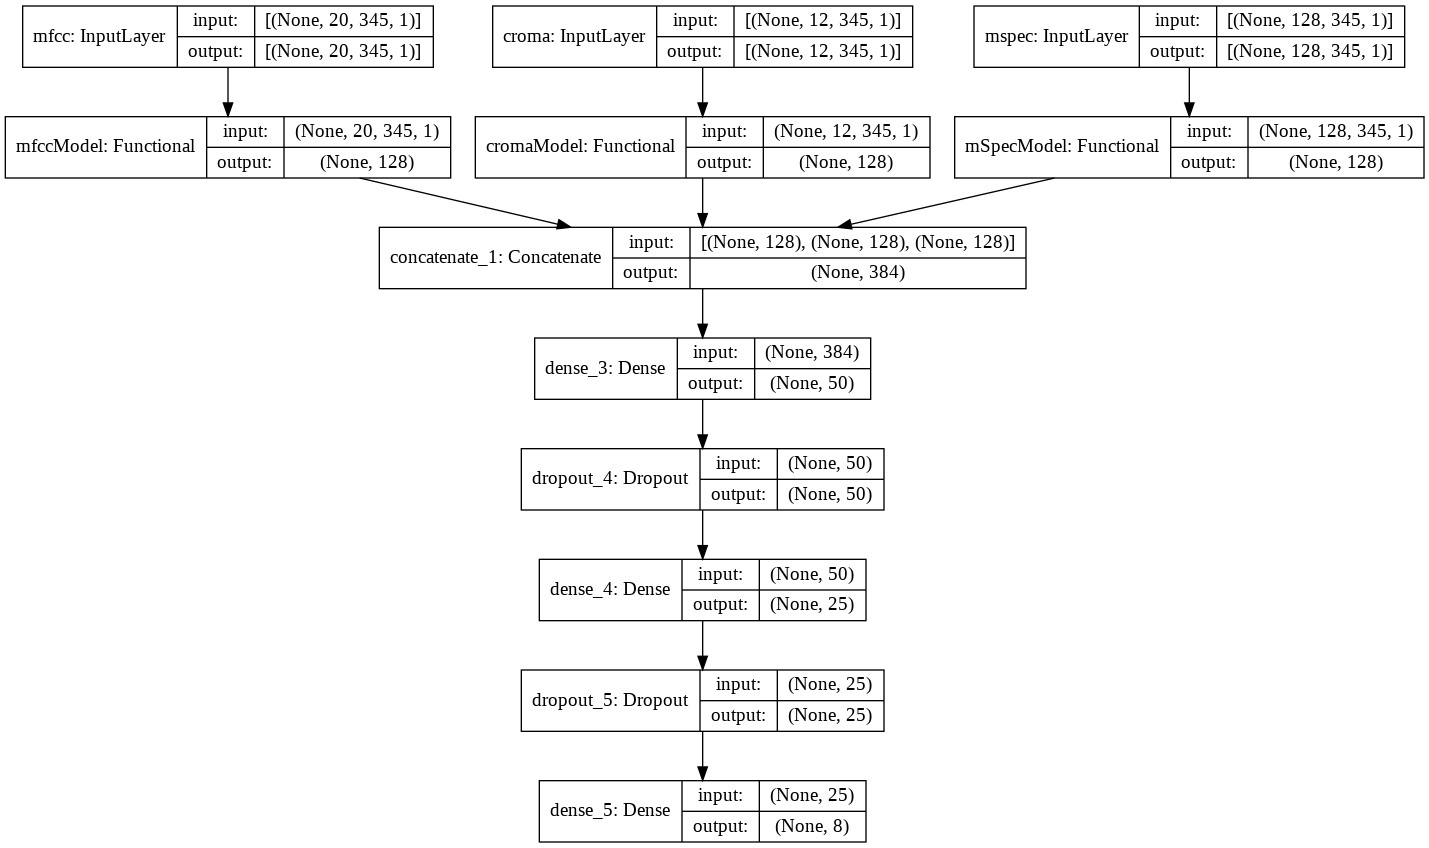

In [ ]:
keras.utils.plot_model(net, "net.png", show_shapes=True)

In [ ]:
from keras import backend as K
net.compile(loss='sparse_categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])
K.set_value(net.optimizer.learning_rate, 0.001)

In [ ]:
history=net.fit(
    {"mfcc":mfcc_train8,"croma":cstft_train8,"mspec":mSpec_train8},
    ytrain,
    validation_data=({"mfcc":mfcc_val8,"croma":cstft_val8,"mspec":mSpec_val8},yval),
    epochs=100,verbose=0,
    callbacks=my_callbacks
)

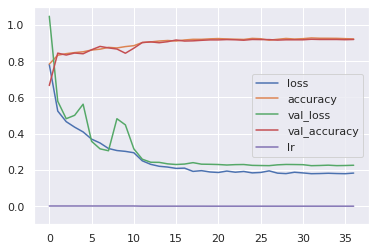

In [ ]:
pd.DataFrame(history.history).plot()
plt.grid(True)
plt.gca().set_ylim(-0.1,1.1)
plt.show()

In [ ]:
net.evaluate({"mfcc":mfcc_val8,"croma":cstft_val8,"mspec":mSpec_val8},yval)

54/54 [==============================] - 8s 140ms/step - loss: 0.2259 - accuracy: 0.9200


[0.22587062418460846, 0.9200000166893005]

In [ ]:
# 6 performs better than 8

# Using RNN

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import librosa as lb
import librosa.display as lbd
import os
import numpy as np
from tqdm import tqdm
from tensorflow.keras.layers import LSTM, Dense, Dropout
from threading import Thread

In [ ]:
#Run the split data set section to get Xtrain Xval ytrain yval and feature extraction for both

In [ ]:
path_to_processed_file="/content/drive/MyDrive/sample_data/Prepro6.csv"
data=pd.read_csv(path_to_processed_file).drop(columns=["Unnamed: 0"])

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain,Xval,ytrain,yval=train_test_split(data,data.disease,stratify=data.disease,random_state=42,test_size=0.25)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
ytrain=le.fit_transform(ytrain)
yval=le.transform(yval)

In [ ]:
class ThreadWithReturnValue(Thread):
    def __init__(self, group=None, target=None, name=None,
                 args=(), kwargs={}, Verbose=None):
        Thread.__init__(self, group, target, name, args, kwargs)
        self._return = None
    def run(self):
        print(type(self._target))
        if self._target is not None:
            self._return = self._target(*self._args,
                                                **self._kwargs)
    def join(self, *args):
        Thread.join(self, *args)
        return self._return

In [ ]:
def features_extractor(path):
    soundArr,sample_rate=lb.load(path)
    mfcc=lb.feature.mfcc(y=soundArr,sr=sample_rate)
    cstft=lb.feature.chroma_stft(y=soundArr,sr=sample_rate)
    mSpec=lb.feature.melspectrogram(y=soundArr,sr=sample_rate)

    return mfcc,cstft,mSpec

In [ ]:
def val_extractor():
 path_to_processed_file="/content/drive/MyDrive/sample_data/Prepro6.csv"
 path_audio_data="/content/drive/MyDrive/processed_audio_files/"
 #df=pd.read_csv(path_to_processed_file).drop(columns=["Unnamed: 0"])
 mfcc,cstft,mSpec=[],[],[]
 for index_num,row in tqdm(Xval.iterrows()):
     file_name = os.path.join(os.path.abspath(path_audio_data),str(row["processed files"])[0:-3]+'wav')
     a,b,c=features_extractor(file_name)
     mfcc.append(a)
     cstft.append(b)
     mSpec.append(c)
 mfcc_val=np.array(mfcc)
 cstft_val=np.array(cstft)
 mSpec_val=np.array(mSpec)
 return mfcc_val,cstft_val,mSpec_val

In [ ]:
thread = ThreadWithReturnValue(target = val_extractor)
thread.start()
path_to_processed_file="/content/drive/MyDrive/sample_data/Prepro6.csv"
path_audio_data="/content/drive/MyDrive/processed_audio_files/"
#df=pd.read_csv(path_to_processed_file).drop(columns=["Unnamed: 0"])
mfcc,cstft,mSpec=[],[],[]
for index_num,row in tqdm(Xtrain.iterrows()):
    file_name = os.path.join(os.path.abspath(path_audio_data),str(row["processed files"])[0:-3]+'wav')
    a,b,c=features_extractor(file_name)
    mfcc.append(a)
    cstft.append(b)
    mSpec.append(c)
mfcc_train=np.array(mfcc)
cstft_train=np.array(cstft)
mSpec_train=np.array(mSpec)
mfcc_val,cstft_val,mSpec_val=thread.join()

In [ ]:
mfcc_val,cstft_val,mSpec_val=val_extractor();

2it [00:00, 14.83it/s]/usr/local/lib/python3.7/dist-packages/librosa/core/pitch.py:153: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn("Trying to estimate tuning from empty frequency set.")
1725it [02:05, 13.72it/s]


In [ ]:
mfcc_input=keras.layers.Input(shape=(20,259,1),name="mfccInput")
x=keras.layers.LSTM(20)(mfcc_input)
x=keras.layers.BatchNormalization()(x)
x=keras.layers.Activation(keras.activations.relu)(x)
x=keras.layers.MaxPooling2D(pool_size=2,padding='valid')(x)

x=keras.layers.Conv2D(64,3,strides=(1,2),padding='same')(x)
x=keras.layers.BatchNormalization()(x)
x=keras.layers.Activation(keras.activations.relu)(x)
x=keras.layers.MaxPooling2D(pool_size=2,padding='valid')(x)

x=keras.layers.Conv2D(96,2,padding='same')(x)
x=keras.layers.BatchNormalization()(x)
x=keras.layers.Activation(keras.activations.relu)(x)
x=keras.layers.MaxPooling2D(pool_size=2,padding='valid')(x)

x=keras.layers.Conv2D(128,2,padding='same')(x)
x=keras.layers.BatchNormalization()(x)
x=keras.layers.Activation(keras.activations.relu)(x)
mfcc_output=keras.layers.GlobalMaxPooling2D()(x)

mfcc_model=keras.Model(mfcc_input, mfcc_output, name="mfccModel")

In [ ]:
input_shape=(20,259)
model = keras.Sequential()
model.add(LSTM(240,input_shape=input_shape))
model.add(Dropout(0.2))
model.add(Dense(1024, activation='sigmoid'))
model.add(Dense(4096, activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(8, activation='softmax'))
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_10 (LSTM)               (None, 240)               480000    
_________________________________________________________________
dropout_29 (Dropout)         (None, 240)               0         
_________________________________________________________________
dense_39 (Dense)             (None, 1024)              246784    
_________________________________________________________________
dense_40 (Dense)             (None, 4096)              4198400   
_________________________________________________________________
dropout_30 (Dropout)         (None, 4096)              0         
_________________________________________________________________
dense_41 (Dense)             (None, 8)                 32776     
Total params: 4,957,960
Trainable params: 4,957,960
Non-trainable params: 0
___________________________________________

In [ ]:
model.compile(optimizer='adam',loss='SparseCategoricalCrossentropy',metrics=['acc'])

In [ ]:
history = model.fit(mfcc_train, ytrain, epochs=50, batch_size=72, 
                    validation_data=(mfcc_val, yval), shuffle=False)

Epoch 1/50
72/72 [==============================] - 4s 25ms/step - loss: 1.1035 - acc: 0.8086 - val_loss: 0.6610 - val_acc: 0.8359
Epoch 2/50
72/72 [==============================] - 1s 17ms/step - loss: 0.6280 - acc: 0.8324 - val_loss: 0.6442 - val_acc: 0.8232
Epoch 3/50
72/72 [==============================] - 1s 17ms/step - loss: 0.5821 - acc: 0.8376 - val_loss: 0.6232 - val_acc: 0.8151
Epoch 4/50
72/72 [==============================] - 1s 17ms/step - loss: 0.5587 - acc: 0.8388 - val_loss: 0.6230 - val_acc: 0.8278
Epoch 5/50
72/72 [==============================] - 1s 17ms/step - loss: 0.5202 - acc: 0.8442 - val_loss: 0.6313 - val_acc: 0.8371
Epoch 6/50
72/72 [==============================] - 1s 17ms/step - loss: 0.4879 - acc: 0.8506 - val_loss: 0.5555 - val_acc: 0.8406
Epoch 7/50
72/72 [==============================] - 1s 17ms/step - loss: 0.4565 - acc: 0.8566 - val_loss: 0.5621 - val_acc: 0.8481
Epoch 8/50
72/72 [==============================] - 1s 17ms/step - loss: 0.4315 - a

In [ ]:
model.predict(mfcc_val)

array([[2.8279931e-07, 2.0995065e-05, 5.5597226e-08, ..., 5.6678622e-09,
        4.0394014e-05, 2.1873273e-06],
       [2.1186312e-07, 9.0625967e-05, 5.2808418e-06, ..., 1.6416885e-07,
        6.4105411e-06, 1.0454322e-05],
       [2.9807373e-07, 1.2894729e-05, 4.6193009e-08, ..., 6.4219643e-09,
        1.0854826e-05, 5.5403098e-07],
       ...,
       [5.9508658e-08, 6.9953699e-06, 5.1892472e-05, ..., 6.6173089e-07,
        3.6217843e-05, 6.0099042e-05],
       [4.4860728e-09, 4.7178435e-07, 1.8478487e-06, ..., 1.4620738e-08,
        1.8821265e-06, 7.6306088e-07],
       [1.0298318e-08, 2.3971770e-06, 2.0969965e-07, ..., 2.9639589e-09,
        1.8378323e-06, 8.7284411e-07]], dtype=float32)

In [ ]:
# Need some modifications
mfcc_input=(20,259)
mfcc_model = keras.Sequential()
mfcc_model.add(LSTM(20,input_shape=input_shape))
mfcc_model.add(Dropout(0.2))
mfcc_model.add(Dense(20, activation='relu'))
mfcc_model.add(Dense(64, activation='relu'))
mfcc_model.add(Dropout(0.4))
mfcc_model.add(Dense(48, activation='relu'))
mfcc_model.add(Dropout(0.4))
mfcc_model.add(Dense(24, activation='softmax'))
model.summary()

In [ ]:
#Need some modifications
croma_input=(12,259)
croma_model = keras.Sequential()
croma_model.add(LSTM(120,input_shape=croma_input))
croma_model.add(Dropout(0.2))
croma_model.add(Dense(1000, activation='relu'))
croma_model.add(Dense(1000, activation='relu'))
croma_model.add(Dropout(0.2))
croma_model.add(Dense(1024, activation='relu'))
croma_model.add(Dropout(0.2))
croma_model.add(Dense(8, activation='softmax'))
croma_model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_13 (LSTM)               (None, 120)               182400    
_________________________________________________________________
dropout_37 (Dropout)         (None, 120)               0         
_________________________________________________________________
dense_50 (Dense)             (None, 1000)              121000    
_________________________________________________________________
dense_51 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dropout_38 (Dropout)         (None, 1000)              0         
_________________________________________________________________
dense_52 (Dense)             (None, 1024)              1025024   
_________________________________________________________________
dropout_39 (Dropout)         (None, 1024)            

In [ ]:
croma_model.compile(optimizer='adam',loss='SparseCategoricalCrossentropy',metrics=['acc'])

In [ ]:
history =croma_model.fit(cstft_train, ytrain, epochs=50, batch_size=72, 
                    validation_data=(cstft_val, yval), shuffle=False)

Epoch 1/50
72/72 [==============================] - 4s 21ms/step - loss: 0.7482 - acc: 0.8220 - val_loss: 0.7131 - val_acc: 0.8330
Epoch 2/50
72/72 [==============================] - 1s 14ms/step - loss: 0.6914 - acc: 0.8330 - val_loss: 0.6927 - val_acc: 0.8330
Epoch 3/50
72/72 [==============================] - 1s 14ms/step - loss: 0.6811 - acc: 0.8330 - val_loss: 0.6874 - val_acc: 0.8330
Epoch 4/50
72/72 [==============================] - 1s 14ms/step - loss: 0.6748 - acc: 0.8330 - val_loss: 0.6856 - val_acc: 0.8330
Epoch 5/50
72/72 [==============================] - 1s 13ms/step - loss: 0.6640 - acc: 0.8330 - val_loss: 0.6816 - val_acc: 0.8330
Epoch 6/50
72/72 [==============================] - 1s 14ms/step - loss: 0.6456 - acc: 0.8332 - val_loss: 0.6738 - val_acc: 0.8330
Epoch 7/50
72/72 [==============================] - 1s 13ms/step - loss: 0.6468 - acc: 0.8322 - val_loss: 0.6713 - val_acc: 0.8330
Epoch 8/50
72/72 [==============================] - 1s 14ms/step - loss: 0.6323 - a

In [ ]:
# Need some modifications
mSpec_input=(128,259)
mSpec_model = keras.Sequential()
mSpec_model.add(LSTM(128,input_shape=mSpec_input))
mSpec_model.add(Dropout(0.2))
mSpec_model.add(Dense(20, activation='relu'))
mSpec_model.add(Dense(64, activation='relu'))
mSpec_model.add(Dropout(0.4))
mSpec_model.add(Dense(48, activation='relu'))
mSpec_model.add(Dropout(0.4))
mSpec_model.add(Dense(8, activation='softmax'))
mSpec_model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_14 (LSTM)               (None, 128)               198656    
_________________________________________________________________
dropout_40 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_54 (Dense)             (None, 20)                2580      
_________________________________________________________________
dense_55 (Dense)             (None, 64)                1344      
_________________________________________________________________
dropout_41 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_56 (Dense)             (None, 48)                3120      
_________________________________________________________________
dropout_42 (Dropout)         (None, 48)              

In [ ]:
mSpec_model.compile(optimizer='adam',loss='SparseCategoricalCrossentropy',metrics=['acc'])
history =mSpec_model.fit(mSpec_train, ytrain, epochs=50, batch_size=72, 
                    validation_data=(mSpec_val, yval), shuffle=False)

Epoch 1/50
72/72 [==============================] - 6s 53ms/step - loss: 1.0734 - acc: 0.8020 - val_loss: 0.7357 - val_acc: 0.8330
Epoch 2/50
72/72 [==============================] - 3s 39ms/step - loss: 0.8221 - acc: 0.8330 - val_loss: 0.7278 - val_acc: 0.8330
Epoch 3/50
72/72 [==============================] - 3s 40ms/step - loss: 0.8001 - acc: 0.8330 - val_loss: 0.7278 - val_acc: 0.8330
Epoch 4/50
72/72 [==============================] - 3s 40ms/step - loss: 0.7934 - acc: 0.8330 - val_loss: 0.7285 - val_acc: 0.8330
Epoch 5/50
72/72 [==============================] - 3s 39ms/step - loss: 0.7870 - acc: 0.8330 - val_loss: 0.7248 - val_acc: 0.8330
Epoch 6/50
72/72 [==============================] - 3s 40ms/step - loss: 0.7722 - acc: 0.8330 - val_loss: 0.7235 - val_acc: 0.8330
Epoch 7/50
72/72 [==============================] - 3s 40ms/step - loss: 0.7666 - acc: 0.8330 - val_loss: 0.7296 - val_acc: 0.8330
Epoch 8/50
72/72 [==============================] - 3s 40ms/step - loss: 0.7519 - a

In [ ]:
input_array=[model.predict(mfcc_train),croma_model.predict(cstft_train),mSpec_model.predict(mSpec_train)]

TypeError: ignored

In [ ]:
# Need some modification
input_mfcc=keras.layers.Input(shape=(20,259,1),name="mfcc")
mfcc=mfcc_model(input_mfcc)

input_croma=keras.layers.Input(shape=(12,259,1),name="croma")
croma=croma_model(input_croma)

input_mSpec=keras.layers.Input(shape=(128,259,1),name="mspec")
mSpec=mSpec_model(input_mSpec)


concat=keras.layers.concatenate([mfcc,croma,mSpec])
hidden=keras.layers.Dropout(0.2)(concat)
hidden=keras.layers.Dense(50,activation='relu')(concat)
hidden=keras.layers.Dropout(0.3)(hidden)
hidden=keras.layers.Dense(25,activation='relu')(hidden)
hidden=keras.layers.Dropout(0.3)(hidden)
output=keras.layers.Dense(8,activation='softmax')(hidden)

net=keras.Model([input_mfcc,input_croma,input_mSpec], output, name="Net")

# Using LSTM

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import librosa as lb
import librosa.display as lbd
import os
import numpy as np
from tqdm import tqdm

In [ ]:
path_to_processed_file="/content/drive/MyDrive/sample_data/Prepro6.csv"
data=pd.read_csv(path_to_processed_file).drop(columns=["Unnamed: 0"])

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain,Xval,ytrain,yval=train_test_split(data,data.disease,stratify=data.disease,random_state=42,test_size=0.25)

In [ ]:
def features_extractor(path):
    soundArr,sample_rate=lb.load(path)
    mfcc=lb.feature.mfcc(y=soundArr,sr=sample_rate)
    cstft=lb.feature.chroma_stft(y=soundArr,sr=sample_rate)
    mSpec=lb.feature.melspectrogram(y=soundArr,sr=sample_rate)

    return mfcc,cstft,mSpec

In [ ]:

path_to_processed_file="/content/drive/MyDrive/sample_data/Prepro6.csv"
path_audio_data="/content/drive/MyDrive/processed_audio_files/"
#df=pd.read_csv(path_to_processed_file).drop(columns=["Unnamed: 0"])
mfcc,cstft,mSpec=[],[],[]
for index_num,row in tqdm(Xtrain.iterrows()):
    file_name = os.path.join(os.path.abspath(path_audio_data),str(row["processed files"])[0:-3]+'wav')
    a,b,c=features_extractor(file_name)
    mfcc.append(a)
    cstft.append(b)
    mSpec.append(c)
mfcc_train=np.array(mfcc)
cstft_train=np.array(cstft)
mSpec_train=np.array(mSpec)

1it [00:07,  7.14s/it]/usr/local/lib/python3.7/dist-packages/librosa/core/pitch.py:153: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn("Trying to estimate tuning from empty frequency set.")
5173it [22:33,  3.82it/s]


In [ ]:

path_to_processed_file="/content/drive/MyDrive/sample_data/Prepro6.csv"
path_audio_data="/content/drive/MyDrive/processed_audio_files/"
#df=pd.read_csv(path_to_processed_file).drop(columns=["Unnamed: 0"])
mfcc,cstft,mSpec=[],[],[]
for index_num,row in tqdm(Xval.iterrows()):
    file_name = os.path.join(os.path.abspath(path_audio_data),str(row["processed files"])[0:-3]+'wav')
    a,b,c=features_extractor(file_name)
    mfcc.append(a)
    cstft.append(b)
    mSpec.append(c)
mfcc_val=np.array(mfcc)
cstft_val=np.array(cstft)
mSpec_val=np.array(mSpec)

2it [00:00,  4.99it/s]/usr/local/lib/python3.7/dist-packages/librosa/core/pitch.py:153: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn("Trying to estimate tuning from empty frequency set.")
1725it [07:20,  3.91it/s]


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
ytrain=le.fit_transform(ytrain)
yval=le.transform(yval)

In [ ]:
## Start applying LSTM
## mfcc_train is for mfcc train data similarly cstft_train  is for chroma  train data
## mfcc_val is for mfcc validation

In [ ]:
!pip install Adam

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, LSTM
from keras.layers import Convolution2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping,ReduceLROnPlateau,ModelCheckpoint,TensorBoard,ProgbarLogger
from keras.utils import np_utils
from sklearn import metrics 
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
import itertools

In [ ]:
print('Build LSTM RNN model ...')
model = Sequential()
model.add(LSTM(units=64, dropout=0.05, recurrent_dropout=0.20, return_sequences=True,input_shape = (20,259)))
model.add(LSTM(units=32, dropout=0.05, recurrent_dropout=0.20, return_sequences=False))
model.add(Dense(1, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='Adamax', metrics=['acc','mse', 'mae', 'mape', 'cosine'])
model.summary()


Build LSTM RNN model ...
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 20, 64)            82944     
_________________________________________________________________
lstm_3 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 95,393
Trainable params: 95,393
Non-trainable params: 0
_________________________________________________________________


In [ ]:
%%time
# saved model checkpoint file
best_model_file="./best_model_trained.hdf5"
#train_model_file=file_path+"/checkpoints/weights.best_{epoch:02d}-{loss:.2f}.hdf5"
MAX_PATIENT=12
MAX_EPOCHS=100
MAX_BATCH=32

# callbacks
# removed EarlyStopping(patience=MAX_PATIENT)
callback=[ReduceLROnPlateau(patience=MAX_PATIENT, verbose=1),
          ModelCheckpoint(filepath=best_model_file, monitor='loss', verbose=1, save_best_only=True)]

print ("training started..... please wait.")
# training
history=model.fit(mfcc_train, ytrain, 
                  batch_size=MAX_BATCH, 
                  epochs=MAX_EPOCHS,
                  verbose=0,
                  validation_data=(mfcc_val, yval),
                  callbacks=callback) 

print ("training finised!")
#error

training started..... please wait.


ValueError: ignored

# Sound to wheez,crackle classification

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import librosa as lb
import librosa.display as lbd
import os
import numpy as np
from tqdm import tqdm

In [ ]:
path_to_processed_file="/content/drive/MyDrive/sample_data/Prepro6.csv"
data=pd.read_csv(path_to_processed_file).drop(columns=["Unnamed: 0"])

In [ ]:
data.loc[(data["crackles"]==0) & (data["wheezes"]==0),:]

start     end  ...  respiratory period                processed files
0      0.036   0.579  ...            1.731652   101_1b1_Al_sc_Meditron_1.wav
1      0.579   2.450  ...            1.731652   101_1b1_Al_sc_Meditron_2.wav
2      2.450   3.893  ...            1.731652   101_1b1_Al_sc_Meditron_3.wav
3      3.893   5.793  ...            1.731652   101_1b1_Al_sc_Meditron_4.wav
4      5.793   7.521  ...            1.731652   101_1b1_Al_sc_Meditron_5.wav
...      ...     ...  ...                 ...                            ...
6888   1.207   3.550  ...            1.926710   226_1b1_Pl_sc_LittC2SE_2.wav
6891   7.879   9.836  ...            1.926710   226_1b1_Pl_sc_LittC2SE_5.wav
6894  13.693  15.536  ...            1.926710   226_1b1_Pl_sc_LittC2SE_8.wav
6895  15.536  17.493  ...            1.926710   226_1b1_Pl_sc_LittC2SE_9.wav
6897  19.436  19.979  ...            1.926710  226_1b1_Pl_sc_LittC2SE_11.wav

[3642 rows x 11 columns]

In [ ]:
data["pattern"]=data["crackles"]*10+data["wheezes"]

In [ ]:
data["pattern"]

0        0
1        0
2        0
3        0
4        0
        ..
6893    10
6894     0
6895     0
6896    10
6897     0
Name: pattern, Length: 6898, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain,Xval,ytrain,yval=train_test_split(data,data.pattern,stratify=data.pattern,random_state=42,test_size=0.25)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
ytrain=le.fit_transform(ytrain)
yval=le.transform(yval)

In [ ]:
set(ytrain)

{0, 1, 2, 3}

In [ ]:
def features_extractor(path):
    soundArr,sample_rate=lb.load(path)
    mfcc=lb.feature.mfcc(y=soundArr,sr=sample_rate)
    cstft=lb.feature.chroma_stft(y=soundArr,sr=sample_rate)
    mSpec=lb.feature.melspectrogram(y=soundArr,sr=sample_rate)

    return mfcc,cstft,mSpec

In [ ]:
path_audio_data="/content/drive/MyDrive/processed_audio_files/"
#df=pd.read_csv(path_to_processed_file).drop(columns=["Unnamed: 0"])
mfcc,cstft,mSpec=[],[],[]
for index_num,row in tqdm(Xval.iterrows()):
    file_name = os.path.join(os.path.abspath(path_audio_data),str(row["processed files"])[0:-3]+'wav')
    a,b,c=features_extractor(file_name)
    mfcc.append(a)
    cstft.append(b)
    mSpec.append(c)
mfcc_val=np.array(mfcc)
cstft_val=np.array(cstft)
mSpec_val=np.array(mSpec)

3it [00:06,  1.48s/it]/usr/local/lib/python3.7/dist-packages/librosa/core/pitch.py:153: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn("Trying to estimate tuning from empty frequency set.")
1725it [08:33,  3.36it/s]


In [ ]:

#path_to_processed_file="/content/drive/MyDrive/sample_data/Prepro6.csv"
path_audio_data="/content/drive/MyDrive/processed_audio_files/"
#df=pd.read_csv(path_to_processed_file).drop(columns=["Unnamed: 0"])
mfcc,cstft,mSpec=[],[],[]
for index_num,row in tqdm(Xtrain.iterrows()):
    file_name = os.path.join(os.path.abspath(path_audio_data),str(row["processed files"])[0:-3]+'wav')
    a,b,c=features_extractor(file_name)
    mfcc.append(a)
    cstft.append(b)
    mSpec.append(c)
mfcc_train=np.array(mfcc)
cstft_train=np.array(cstft)
mSpec_train=np.array(mSpec)

3it [00:00,  2.88it/s]/usr/local/lib/python3.7/dist-packages/librosa/core/pitch.py:153: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn("Trying to estimate tuning from empty frequency set.")
5173it [23:42,  3.64it/s]


In [ ]:
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=5),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=3, min_lr=0.00001,mode='min')
]

In [ ]:
mfcc_input=keras.layers.Input(shape=(20,259,1),name="mfccInput")
x=keras.layers.Conv2D(32,5,strides=(1,3),padding='same')(mfcc_input)
x=keras.layers.BatchNormalization()(x)
x=keras.layers.Activation(keras.activations.relu)(x)
x=keras.layers.MaxPooling2D(pool_size=2,padding='valid')(x)

x=keras.layers.Conv2D(64,3,strides=(1,2),padding='same')(x)
x=keras.layers.BatchNormalization()(x)
x=keras.layers.Activation(keras.activations.relu)(x)
x=keras.layers.MaxPooling2D(pool_size=2,padding='valid')(x)

x=keras.layers.Conv2D(96,2,padding='same')(x)
x=keras.layers.BatchNormalization()(x)
x=keras.layers.Activation(keras.activations.relu)(x)
x=keras.layers.MaxPooling2D(pool_size=2,padding='valid')(x)

x=keras.layers.Conv2D(128,2,padding='same')(x)
x=keras.layers.BatchNormalization()(x)
x=keras.layers.Activation(keras.activations.relu)(x)
mfcc_output=keras.layers.GlobalMaxPooling2D()(x)

mfcc_model=keras.Model(mfcc_input, mfcc_output, name="mfccModel")

In [ ]:
mfcc_model.summary()

Model: "mfccModel"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mfccInput (InputLayer)       [(None, 20, 259, 1)]      0         
_________________________________________________________________
conv2d (Conv2D)              (None, 20, 87, 32)        832       
_________________________________________________________________
batch_normalization (BatchNo (None, 20, 87, 32)        128       
_________________________________________________________________
activation (Activation)      (None, 20, 87, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 10, 43, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 22, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 10, 22, 64)        25

In [ ]:
croma_input=keras.layers.Input(shape=(12,259,1),name="cromaInput")
x=keras.layers.Conv2D(32,5,strides=(1,3),padding='same')(croma_input)
x=keras.layers.BatchNormalization()(x)
x=keras.layers.Activation(keras.activations.relu)(x)
x=keras.layers.MaxPooling2D(pool_size=2,padding='valid')(x)

x=keras.layers.Conv2D(64,3,strides=(1,2),padding='same')(x)
x=keras.layers.BatchNormalization()(x)
x=keras.layers.Activation(keras.activations.relu)(x)
x=keras.layers.MaxPooling2D(pool_size=2,padding='valid')(x)

x=keras.layers.Conv2D(128,2,padding='same')(x)
x=keras.layers.BatchNormalization()(x)
x=keras.layers.Activation(keras.activations.relu)(x)
croma_output=keras.layers.GlobalMaxPooling2D()(x)

croma_model=keras.Model(croma_input, croma_output, name="cromaModel")

In [ ]:
croma_model.summary()

Model: "cromaModel"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cromaInput (InputLayer)      [(None, 12, 259, 1)]      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 12, 87, 32)        832       
_________________________________________________________________
batch_normalization_4 (Batch (None, 12, 87, 32)        128       
_________________________________________________________________
activation_4 (Activation)    (None, 12, 87, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 43, 32)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 6, 22, 64)         18496     
_________________________________________________________________
batch_normalization_5 (Batch (None, 6, 22, 64)         2

In [ ]:
mSpec_input=keras.layers.Input(shape=(128,259,1),name="mSpecInput")
x=keras.layers.Conv2D(32,5,strides=(2,3),padding='same')(mSpec_input)
x=keras.layers.BatchNormalization()(x)
x=keras.layers.Activation(keras.activations.relu)(x)
x=keras.layers.MaxPooling2D(pool_size=2,padding='valid')(x)

x=keras.layers.Conv2D(64,3,strides=(2,2),padding='same')(x)
x=keras.layers.BatchNormalization()(x)
x=keras.layers.Activation(keras.activations.relu)(x)
x=keras.layers.MaxPooling2D(pool_size=2,padding='valid')(x)

x=keras.layers.Conv2D(96,2,padding='same')(x)
x=keras.layers.BatchNormalization()(x)
x=keras.layers.Activation(keras.activations.relu)(x)
x=keras.layers.MaxPooling2D(pool_size=2,padding='valid')(x)

x=keras.layers.Conv2D(128,2,padding='same')(x)
x=keras.layers.BatchNormalization()(x)
x=keras.layers.Activation(keras.activations.relu)(x)
mSpec_output=keras.layers.GlobalMaxPooling2D()(x)

mSpec_model=keras.Model(mSpec_input, mSpec_output, name="mSpecModel")

In [ ]:
mSpec_model.summary()

Model: "mSpecModel"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mSpecInput (InputLayer)      [(None, 128, 259, 1)]     0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 64, 87, 32)        832       
_________________________________________________________________
batch_normalization_7 (Batch (None, 64, 87, 32)        128       
_________________________________________________________________
activation_7 (Activation)    (None, 64, 87, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 32, 43, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 22, 64)        18496     
_________________________________________________________________
batch_normalization_8 (Batch (None, 16, 22, 64)        2

In [ ]:
input_mfcc=keras.layers.Input(shape=(20,259,1),name="mfcc")
mfcc=mfcc_model(input_mfcc)

input_croma=keras.layers.Input(shape=(12,259,1),name="croma")
croma=croma_model(input_croma)

input_mSpec=keras.layers.Input(shape=(128,259,1),name="mspec")
mSpec=mSpec_model(input_mSpec)


concat=keras.layers.concatenate([mfcc,croma,mSpec])
hidden=keras.layers.Dropout(0.2)(concat)
hidden=keras.layers.Dense(50,activation='relu')(concat)
hidden=keras.layers.Dropout(0.3)(hidden)
hidden=keras.layers.Dense(25,activation='relu')(hidden)
hidden=keras.layers.Dropout(0.3)(hidden)
output=keras.layers.Dense(8,activation='softmax')(hidden)

net=keras.Model([input_mfcc,input_croma,input_mSpec], output, name="Net")

In [ ]:
net.summary()

Model: "Net"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
mfcc (InputLayer)               [(None, 20, 259, 1)] 0                                            
__________________________________________________________________________________________________
croma (InputLayer)              [(None, 12, 259, 1)] 0                                            
__________________________________________________________________________________________________
mspec (InputLayer)              [(None, 128, 259, 1) 0                                            
__________________________________________________________________________________________________
mfccModel (Functional)          (None, 128)          94560       mfcc[0][0]                       
________________________________________________________________________________________________

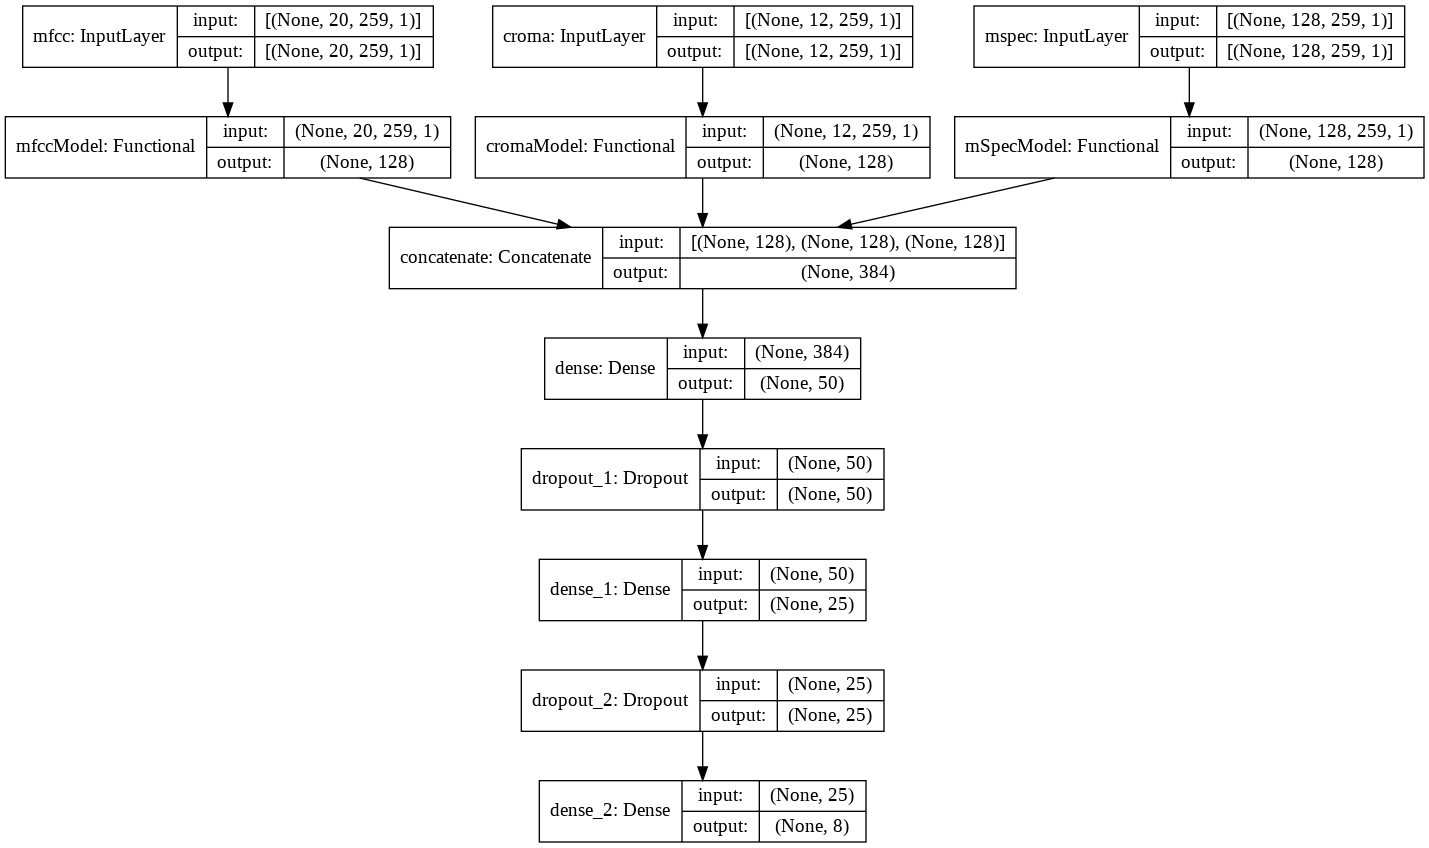

In [ ]:
keras.utils.plot_model(net, "net.png", show_shapes=True)

In [ ]:
from keras import backend as K
net.compile(loss='sparse_categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])
K.set_value(net.optimizer.learning_rate, 0.001)

In [ ]:
history=net.fit(
    {"mfcc":mfcc_train,"croma":cstft_train,"mspec":mSpec_train},
    ytrain,
    validation_data=({"mfcc":mfcc_val,"croma":cstft_val,"mspec":mSpec_val},yval),
    epochs=100,verbose=0,
    callbacks=my_callbacks
)

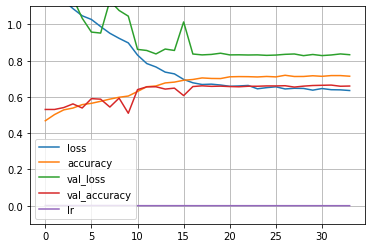

In [ ]:
pd.DataFrame(history.history).plot()
plt.grid(True)
plt.gca().set_ylim(-0.1,1.1)
plt.show()

In [ ]:
net.evaluate({"mfcc":mfcc_val,"croma":cstft_val,"mspec":mSpec_val},yval)

54/54 [==============================] - 1s 13ms/step - loss: 0.8331 - accuracy: 0.6603


[0.8331445455551147, 0.6602898836135864]

In [ ]:
net.evaluate({"mfcc":mfcc_train,"croma":cstft_train,"mspec":mSpec_train},ytrain)

162/162 [==============================] - 2s 13ms/step - loss: 0.5287 - accuracy: 0.7806


[0.5287216901779175, 0.7805915474891663]

# Severity

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import librosa as lb
import librosa.display as lbd
import os
import numpy as np
from tqdm import tqdm
from tensorflow.keras.layers import LSTM, Dense, Dropout
from threading import Thread
from matplotlib.pyplot import figure

In [ ]:
path_to_processed_file="/content/drive/MyDrive/sample_data/Prepro6.csv"
data=pd.read_csv(path_to_processed_file).drop(columns=["Unnamed: 0"])

In [ ]:
data

start     end  ...  respiratory period                processed files
0      0.036   0.579  ...            1.731652   101_1b1_Al_sc_Meditron_1.wav
1      0.579   2.450  ...            1.731652   101_1b1_Al_sc_Meditron_2.wav
2      2.450   3.893  ...            1.731652   101_1b1_Al_sc_Meditron_3.wav
3      3.893   5.793  ...            1.731652   101_1b1_Al_sc_Meditron_4.wav
4      5.793   7.521  ...            1.731652   101_1b1_Al_sc_Meditron_5.wav
...      ...     ...  ...                 ...                            ...
6893  11.721  13.693  ...            1.926710   226_1b1_Pl_sc_LittC2SE_7.wav
6894  13.693  15.536  ...            1.926710   226_1b1_Pl_sc_LittC2SE_8.wav
6895  15.536  17.493  ...            1.926710   226_1b1_Pl_sc_LittC2SE_9.wav
6896  17.493  19.436  ...            1.926710  226_1b1_Pl_sc_LittC2SE_10.wav
6897  19.436  19.979  ...            1.926710  226_1b1_Pl_sc_LittC2SE_11.wav

[6898 rows x 11 columns]

In [ ]:
data1=data.groupby(["filename"]).mean()["crackles"]

In [ ]:
data2=data.groupby(["filename"]).mean()["wheezes"]

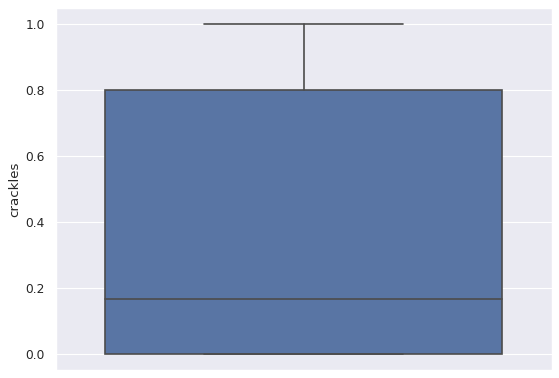

In [ ]:
# Respiratory cycle length
figure(figsize=(8, 6), dpi=80)
sns.set(style='darkgrid')
sns.boxplot(y=data1)

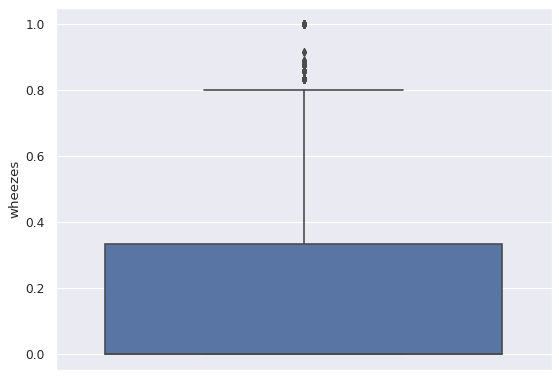

In [ ]:
# Respiratory cycle length
figure(figsize=(8, 6), dpi=80)
sns.set(style='darkgrid')
sns.boxplot(y=data2)

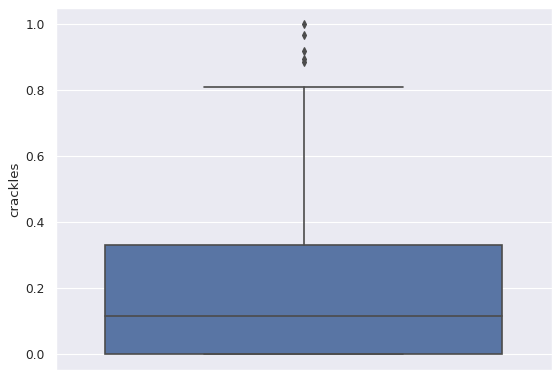

In [ ]:
# Respiratory cycle length
figure(figsize=(8, 6), dpi=80)
sns.set(style='darkgrid')
sns.boxplot(y=data.groupby(["id"]).mean()["crackles"])


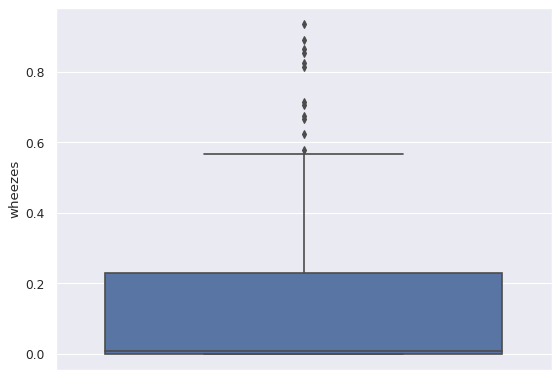

In [ ]:
# Respiratory cycle length
figure(figsize=(8, 6), dpi=80)
sns.set(style='darkgrid')
sns.boxplot(y=data.groupby(["id"]).mean()["wheezes"])


In [ ]:
data.groupby(["id"]).mean().loc[:,["crackles","wheezes"]].corr()

crackles   wheezes
crackles  1.000000  0.192618
wheezes   0.192618  1.000000

In [ ]:
data.groupby(["id"])["disease"]

# Graph for different diseases

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import librosa as lb
import librosa
import librosa.display as lbd
import os
import numpy as np
from tqdm import tqdm
from tensorflow.keras.layers import LSTM, Dense, Dropout
from threading import Thread
from matplotlib.pyplot import figure

In [ ]:
path_to_processed_file="/content/drive/MyDrive/sample_data/Prepro6.csv"
data=pd.read_csv(path_to_processed_file).drop(columns=["Unnamed: 0"])
path_audio_data="/content/drive/MyDrive/processed_audio_files/"
path_audio_data1="/content/drive/MyDrive/sample_data/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/"

In [ ]:
data

start     end  ...  respiratory period                processed files
0      0.036   0.579  ...            1.731652   101_1b1_Al_sc_Meditron_1.wav
1      0.579   2.450  ...            1.731652   101_1b1_Al_sc_Meditron_2.wav
2      2.450   3.893  ...            1.731652   101_1b1_Al_sc_Meditron_3.wav
3      3.893   5.793  ...            1.731652   101_1b1_Al_sc_Meditron_4.wav
4      5.793   7.521  ...            1.731652   101_1b1_Al_sc_Meditron_5.wav
...      ...     ...  ...                 ...                            ...
6893  11.721  13.693  ...            1.926710   226_1b1_Pl_sc_LittC2SE_7.wav
6894  13.693  15.536  ...            1.926710   226_1b1_Pl_sc_LittC2SE_8.wav
6895  15.536  17.493  ...            1.926710   226_1b1_Pl_sc_LittC2SE_9.wav
6896  17.493  19.436  ...            1.926710  226_1b1_Pl_sc_LittC2SE_10.wav
6897  19.436  19.979  ...            1.926710  226_1b1_Pl_sc_LittC2SE_11.wav

[6898 rows x 11 columns]

In [ ]:
data[data.disease=="Bronchiectasis"]

start     end  ...  respiratory period               processed files
475    0.022   2.350  ...            2.348706  111_1b2_Tc_sc_Meditron_1.wav
476    2.350   5.007  ...            2.348706  111_1b2_Tc_sc_Meditron_2.wav
477    5.007   7.564  ...            2.348706  111_1b2_Tc_sc_Meditron_3.wav
478    7.564  10.364  ...            2.348706  111_1b2_Tc_sc_Meditron_4.wav
479   10.364  13.036  ...            2.348706  111_1b2_Tc_sc_Meditron_5.wav
...      ...     ...  ...                 ...                           ...
6485   1.693   6.022  ...            3.625909  215_1b3_Tc_sc_Meditron_2.wav
6486   6.022  10.507  ...            3.625909  215_1b3_Tc_sc_Meditron_3.wav
6487  10.507  14.664  ...            3.625909  215_1b3_Tc_sc_Meditron_4.wav
6488  14.664  18.907  ...            3.625909  215_1b3_Tc_sc_Meditron_5.wav
6489  18.907  19.964  ...            3.625909  215_1b3_Tc_sc_Meditron_6.wav

[104 rows x 11 columns]

In [ ]:
data1,sample_rate=lb.load(path_audio_data1+"111_1b2_Tc_sc_Meditron.wav")

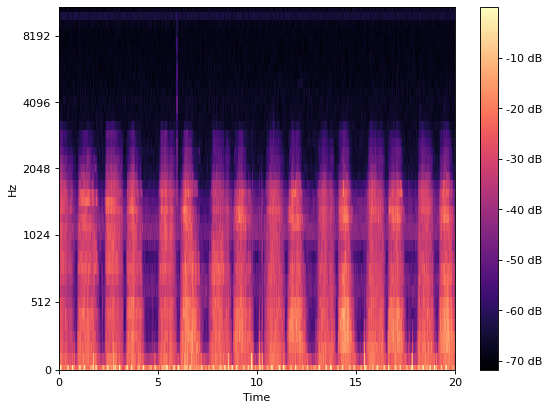

In [ ]:
plot(data1,sample_rate)

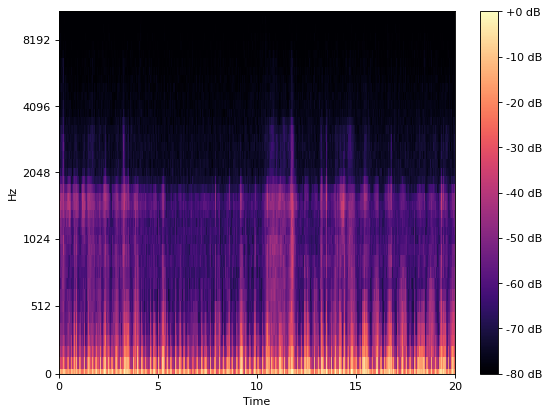

In [ ]:
data1,sample_rate=lb.load(path_audio_data1+"149_1b1_Al_sc_Meditron.wav")
plot(data1,sample_rate)

In [ ]:
def plot(data,sample_rate):  
 whale_song, _ = librosa.effects.trim(data)
 S = librosa.feature.melspectrogram(whale_song, sr=sample_rate, n_fft=2048, hop_length=512, n_mels=40)
 S_DB = librosa.power_to_db(S, ref=np.max)
 figure(figsize=(8, 6), dpi=80)
 librosa.display.specshow(S_DB, sr=sample_rate, hop_length=512, x_axis='time', y_axis='mel');
 plt.colorbar(format='%+2.0f dB')
 plt.show()